<a href="https://colab.research.google.com/github/deway29/pengarsipan_PDRT/blob/master/Group_M_%5BBarca_May23%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd                 # Library used for working with data sets and perform data analysis.
import numpy as np                  # To perform mathematical operasion and statistics
from datetime import datetime       # Used to perform dates and time manipulation
import seaborn as sns               # To perform data visualization
import matplotlib.pyplot as plt
import gdown

from statsmodels.graphics.mosaicplot import mosaic
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.linear_model import LinearRegression

In [ ]:
#Import dataset from spreadsheet
account_url  = 'https://docs.google.com/spreadsheets/d/1W_Ih-p3CAhY0aAAgBkjPucr-gR8UL3lWYGsw_DJexoQ/edit#gid=163827321'
account_url_replace = account_url.replace('/edit#gid=', '/export?format=csv&gid=')#to convert the spreadsheet format into csv

print(account_url_replace)#To show the link to csv

https://docs.google.com/spreadsheets/d/1W_Ih-p3CAhY0aAAgBkjPucr-gR8UL3lWYGsw_DJexoQ/export?format=csv&gid=163827321


In [ ]:
sales = pd.read_csv(account_url_replace)#to load/read the csv into pandas dataframe
sales.head()#Showing first 5 rows in the dataset

OrderNumber Sales_Channel WarehouseCode ProcuredDate  OrderDate   ShipDate  \
0          101      In-Store  WARE-UHY1004   12/31/2017  5/31/2018  6/14/2018   
1          102        Online  WARE-NMK1003   12/31/2017  5/31/2018  6/22/2018   
2          103   Distributor  WARE-UHY1004   12/31/2017  5/31/2018  6/21/2018   
3          104     Wholesale  WARE-NMK1003   12/31/2017  5/31/2018   6/2/2018   
4          105   Distributor  WARE-NMK1003    4/10/2018  5/31/2018  6/16/2018   

  DeliveryDate CurrencyCode  _SalesTeamID     SalesTeamID  _CustomerID  \
0    6/19/2018          USD             6  Joshua Bennett           15   
1     7/2/2018          USD            14     Paul Holmes           20   
2     7/1/2018          USD            21   Samuel Fowler           16   
3     6/7/2018          USD            28   Carlos Miller           48   
4    6/26/2018          USD            22       Joe Price           49   

   _StoreID StateCode     Region  _ProductID           Product  \
0       259        NY  Northeast          12  Dining Furniture   
1       196        KS    Midwest          27           Wreaths   
2       213        MI    Midwest          16          Stemware   
3       107        CT  Northeast          23       Accessories   
4       111        CT  Northeast          26           Candles   

   Order_Quantity  Discount_Applied  Unit_Price  Unit_Cost  
0               5             0.075      1963.1    1001.18  
1               3             0.075      3939.6    3348.66  
2               1             0.050      1775.5     781.22  
3               8             0.075      2324.9    1464.69  
4               8             0.100      1822.4    1476.14

In [ ]:
sales.shape

(7991, 20)

In [ ]:
sales.columns

Index(['OrderNumber', 'Sales_Channel', 'WarehouseCode', 'ProcuredDate',
       'OrderDate', 'ShipDate', 'DeliveryDate', 'CurrencyCode', '_SalesTeamID',
       'SalesTeamID', '_CustomerID', '_StoreID', 'StateCode', 'Region',
       '_ProductID', 'Product', 'Order_Quantity', 'Discount_Applied',
       'Unit_Price', 'Unit_Cost'],
      dtype='object')

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderNumber       7991 non-null   int64  
 1   Sales_Channel     7991 non-null   object 
 2   WarehouseCode     7991 non-null   object 
 3   ProcuredDate      7991 non-null   object 
 4   OrderDate         7991 non-null   object 
 5   ShipDate          7991 non-null   object 
 6   DeliveryDate      7991 non-null   object 
 7   CurrencyCode      7991 non-null   object 
 8   _SalesTeamID      7991 non-null   int64  
 9   SalesTeamID       7991 non-null   object 
 10  _CustomerID       7991 non-null   int64  
 11  _StoreID          7991 non-null   int64  
 12  StateCode         7991 non-null   object 
 13  Region            7991 non-null   object 
 14  _ProductID        7991 non-null   int64  
 15  Product           7991 non-null   object 
 16  Order_Quantity    7991 non-null   int64  


In [ ]:
sales_dc = sales.copy()

In [ ]:
sales_dc.head()

OrderNumber Sales_Channel WarehouseCode ProcuredDate  OrderDate   ShipDate  \
0          101      In-Store  WARE-UHY1004   12/31/2017  5/31/2018  6/14/2018   
1          102        Online  WARE-NMK1003   12/31/2017  5/31/2018  6/22/2018   
2          103   Distributor  WARE-UHY1004   12/31/2017  5/31/2018  6/21/2018   
3          104     Wholesale  WARE-NMK1003   12/31/2017  5/31/2018   6/2/2018   
4          105   Distributor  WARE-NMK1003    4/10/2018  5/31/2018  6/16/2018   

  DeliveryDate CurrencyCode  _SalesTeamID     SalesTeamID  _CustomerID  \
0    6/19/2018          USD             6  Joshua Bennett           15   
1     7/2/2018          USD            14     Paul Holmes           20   
2     7/1/2018          USD            21   Samuel Fowler           16   
3     6/7/2018          USD            28   Carlos Miller           48   
4    6/26/2018          USD            22       Joe Price           49   

   _StoreID StateCode     Region  _ProductID           Product  \
0       259        NY  Northeast          12  Dining Furniture   
1       196        KS    Midwest          27           Wreaths   
2       213        MI    Midwest          16          Stemware   
3       107        CT  Northeast          23       Accessories   
4       111        CT  Northeast          26           Candles   

   Order_Quantity  Discount_Applied  Unit_Price  Unit_Cost  
0               5             0.075      1963.1    1001.18  
1               3             0.075      3939.6    3348.66  
2               1             0.050      1775.5     781.22  
3               8             0.075      2324.9    1464.69  
4               8             0.100      1822.4    1476.14

Merubah tipe data menjadistring lalu dibuh menjadi datetime supaya bisa mudah melihat transaksi di buat pada tahun berapa

In [ ]:
sales_dc['DeliveryDate'] = sales_dc['DeliveryDate'].astype(str)

In [ ]:
#sales_dc['DeliveryDate'] = pd.to_datetime(sales_dc['DeliveryDate'], format = '%d-%m-%Y')
sales_dc['DeliveryDate'] = pd.to_datetime(sales_dc['DeliveryDate'])

#pd.sales_dc(sales_dc['DeliveryDate'], format = '%Y-%m-%d')

In [ ]:
sales_dc['Tahun'] = sales_dc['DeliveryDate'].dt.year

In [ ]:
sales_dc.head()


OrderNumber Sales_Channel WarehouseCode ProcuredDate  OrderDate   ShipDate  \
0          101      In-Store  WARE-UHY1004   12/31/2017  5/31/2018  6/14/2018   
1          102        Online  WARE-NMK1003   12/31/2017  5/31/2018  6/22/2018   
2          103   Distributor  WARE-UHY1004   12/31/2017  5/31/2018  6/21/2018   
3          104     Wholesale  WARE-NMK1003   12/31/2017  5/31/2018   6/2/2018   
4          105   Distributor  WARE-NMK1003    4/10/2018  5/31/2018  6/16/2018   

  DeliveryDate CurrencyCode  _SalesTeamID     SalesTeamID  ...  _StoreID  \
0   2018-06-19          USD             6  Joshua Bennett  ...       259   
1   2018-07-02          USD            14     Paul Holmes  ...       196   
2   2018-07-01          USD            21   Samuel Fowler  ...       213   
3   2018-06-07          USD            28   Carlos Miller  ...       107   
4   2018-06-26          USD            22       Joe Price  ...       111   

   StateCode     Region _ProductID           Product Order_Quantity  \
0         NY  Northeast         12  Dining Furniture              5   
1         KS    Midwest         27           Wreaths              3   
2         MI    Midwest         16          Stemware              1   
3         CT  Northeast         23       Accessories              8   
4         CT  Northeast         26           Candles              8   

   Discount_Applied  Unit_Price  Unit_Cost  Tahun  
0             0.075      1963.1    1001.18   2018  
1             0.075      3939.6    3348.66   2018  
2             0.050      1775.5     781.22   2018  
3             0.075      2324.9    1464.69   2018  
4             0.100      1822.4    1476.14   2018  

[5 rows x 21 columns]

In [ ]:
sales_dc.head().isnull().sum() #Check how much null values exist

OrderNumber         0
Sales_Channel       0
WarehouseCode       0
ProcuredDate        0
OrderDate           0
ShipDate            0
DeliveryDate        0
CurrencyCode        0
_SalesTeamID        0
SalesTeamID         0
_CustomerID         0
_StoreID            0
StateCode           0
Region              0
_ProductID          0
Product             0
Order_Quantity      0
Discount_Applied    0
Unit_Price          0
Unit_Cost           0
Tahun               0
dtype: int64

In [ ]:
sales_dc.head()['Unit_Price'].value_counts()

1963.1    1
3939.6    1
1775.5    1
2324.9    1
1822.4    1
Name: Unit_Price, dtype: int64

In [ ]:
sales_dc.head()['Region'].value_counts()

Northeast    3
Midwest      2
Name: Region, dtype: int64

Menampilkan kolom harga sebelum di beri diskon (Optional saya cumamau liat pebandingannya saja)

In [ ]:
sales_dc['Before_Disc'] = ((sales_dc['Unit_Price'] * sales_dc['Order_Quantity']) - sales_dc['Unit_Cost']) * (sales_dc['Order_Quantity'])

In [ ]:
sales_dc.head().head()


OrderNumber Sales_Channel WarehouseCode ProcuredDate  OrderDate   ShipDate  \
0          101      In-Store  WARE-UHY1004   12/31/2017  5/31/2018  6/14/2018   
1          102        Online  WARE-NMK1003   12/31/2017  5/31/2018  6/22/2018   
2          103   Distributor  WARE-UHY1004   12/31/2017  5/31/2018  6/21/2018   
3          104     Wholesale  WARE-NMK1003   12/31/2017  5/31/2018   6/2/2018   
4          105   Distributor  WARE-NMK1003    4/10/2018  5/31/2018  6/16/2018   

  DeliveryDate CurrencyCode  _SalesTeamID     SalesTeamID  ...  StateCode  \
0   2018-06-19          USD             6  Joshua Bennett  ...         NY   
1   2018-07-02          USD            14     Paul Holmes  ...         KS   
2   2018-07-01          USD            21   Samuel Fowler  ...         MI   
3   2018-06-07          USD            28   Carlos Miller  ...         CT   
4   2018-06-26          USD            22       Joe Price  ...         CT   

      Region _ProductID           Product  Order_Quantity Discount_Applied  \
0  Northeast         12  Dining Furniture               5            0.075   
1    Midwest         27           Wreaths               3            0.075   
2    Midwest         16          Stemware               1            0.050   
3  Northeast         23       Accessories               8            0.075   
4  Northeast         26           Candles               8            0.100   

   Unit_Price  Unit_Cost  Tahun  Before_Disc  
0      1963.1    1001.18   2018     44071.60  
1      3939.6    3348.66   2018     25410.42  
2      1775.5     781.22   2018       994.28  
3      2324.9    1464.69   2018    137076.08  
4      1822.4    1476.14   2018    104824.48  

[5 rows x 22 columns]

Menghitung profit

In [ ]:
sales_dc['Profit'] = (sales_dc['Before_Disc'] * (1-sales_dc['Discount_Applied']))

#(df['Total_Cost'] * (1-(df['Discount_Applied'])))

In [ ]:
sales_dc.head()

OrderNumber Sales_Channel WarehouseCode ProcuredDate  OrderDate   ShipDate  \
0          101      In-Store  WARE-UHY1004   12/31/2017  5/31/2018  6/14/2018   
1          102        Online  WARE-NMK1003   12/31/2017  5/31/2018  6/22/2018   
2          103   Distributor  WARE-UHY1004   12/31/2017  5/31/2018  6/21/2018   
3          104     Wholesale  WARE-NMK1003   12/31/2017  5/31/2018   6/2/2018   
4          105   Distributor  WARE-NMK1003    4/10/2018  5/31/2018  6/16/2018   

  DeliveryDate CurrencyCode  _SalesTeamID     SalesTeamID  ...     Region  \
0   2018-06-19          USD             6  Joshua Bennett  ...  Northeast   
1   2018-07-02          USD            14     Paul Holmes  ...    Midwest   
2   2018-07-01          USD            21   Samuel Fowler  ...    Midwest   
3   2018-06-07          USD            28   Carlos Miller  ...  Northeast   
4   2018-06-26          USD            22       Joe Price  ...  Northeast   

   _ProductID           Product Order_Quantity  Discount_Applied Unit_Price  \
0          12  Dining Furniture              5             0.075     1963.1   
1          27           Wreaths              3             0.075     3939.6   
2          16          Stemware              1             0.050     1775.5   
3          23       Accessories              8             0.075     2324.9   
4          26           Candles              8             0.100     1822.4   

   Unit_Cost  Tahun  Before_Disc       Profit  
0    1001.18   2018     44071.60   40766.2300  
1    3348.66   2018     25410.42   23504.6385  
2     781.22   2018       994.28     944.5660  
3    1464.69   2018    137076.08  126795.3740  
4    1476.14   2018    104824.48   94342.0320  

[5 rows x 23 columns]

Memfilter transaksi hanya tahun 2020

In [ ]:
sales_tahun = sales_dc[sales_dc['Tahun'] == 2020]
print(sales_tahun)

      OrderNumber Sales_Channel WarehouseCode ProcuredDate   OrderDate  \
4623         4724      In-Store  WARE-NMK1003    8/23/2019   12/1/2019   
4624         4725        Online  WARE-UHY1004    8/23/2019   12/2/2019   
4625         4726        Online  WARE-NMK1003    8/23/2019   12/2/2019   
4628         4729        Online  WARE-NBV1002    8/23/2019   12/2/2019   
4630         4731        Online  WARE-XYS1001    8/23/2019   12/2/2019   
...           ...           ...           ...          ...         ...   
7904         8005     Wholesale  WARE-XYS1001    9/26/2020  12/21/2020   
7912         8013   Distributor  WARE-NBV1002    9/26/2020  12/21/2020   
7916         8017        Online  WARE-NBV1002    9/26/2020  12/22/2020   
7928         8029        Online  WARE-PUJ1005    9/26/2020  12/23/2020   
7934         8035      In-Store  WARE-XYS1001    9/26/2020  12/24/2020   

        ShipDate DeliveryDate CurrencyCode  _SalesTeamID          SalesTeamID  \
4623  12/26/2019   2020-01-03 

In [ ]:
sales_tahun.head()

OrderNumber Sales_Channel WarehouseCode ProcuredDate  OrderDate  \
4623         4724      In-Store  WARE-NMK1003    8/23/2019  12/1/2019   
4624         4725        Online  WARE-UHY1004    8/23/2019  12/2/2019   
4625         4726        Online  WARE-NMK1003    8/23/2019  12/2/2019   
4628         4729        Online  WARE-NBV1002    8/23/2019  12/2/2019   
4630         4731        Online  WARE-XYS1001    8/23/2019  12/2/2019   

        ShipDate DeliveryDate CurrencyCode  _SalesTeamID          SalesTeamID  \
4623  12/26/2019   2020-01-03          USD             9          Joshua Ryan   
4624  12/29/2019   2020-01-04          USD            15      Roger Alexander   
4625  12/29/2019   2020-01-02          USD            18        Shawn Wallace   
4628  12/25/2019   2020-01-01          USD            15      Roger Alexander   
4630  12/30/2019   2020-01-09          USD            19  Nicholas Cunningham   

      ...     Region  _ProductID             Product Order_Quantity  \
4623  ...      South          44             Festive              4   
4624  ...  Northeast          13            Bakeware              5   
4625  ...    Midwest          18  Furniture Cushions              1   
4628  ...       West          44             Festive              4   
4630  ...      South           3         Table Lamps              7   

      Discount_Applied Unit_Price  Unit_Cost  Tahun  Before_Disc      Profit  
4623              0.15     2572.8    1132.03   2020     36636.68   31141.178  
4624              0.05     1065.3     585.92   2020     23702.90   22517.755  
4625              0.05     2298.1    1884.44   2020       413.66     392.977  
4628              0.40     1098.8     472.48   2020     15690.88    9414.528  
4630              0.05     2532.6    1696.84   2020    112219.52  106608.544  

[5 rows x 23 columns]

In [ ]:
#Preparing a copy of df_clean for EDA
df_eda = sales_tahun.copy()
df_eda.head()

OrderNumber Sales_Channel WarehouseCode ProcuredDate  OrderDate  \
4623         4724      In-Store  WARE-NMK1003    8/23/2019  12/1/2019   
4624         4725        Online  WARE-UHY1004    8/23/2019  12/2/2019   
4625         4726        Online  WARE-NMK1003    8/23/2019  12/2/2019   
4628         4729        Online  WARE-NBV1002    8/23/2019  12/2/2019   
4630         4731        Online  WARE-XYS1001    8/23/2019  12/2/2019   

        ShipDate DeliveryDate CurrencyCode  _SalesTeamID          SalesTeamID  \
4623  12/26/2019   2020-01-03          USD             9          Joshua Ryan   
4624  12/29/2019   2020-01-04          USD            15      Roger Alexander   
4625  12/29/2019   2020-01-02          USD            18        Shawn Wallace   
4628  12/25/2019   2020-01-01          USD            15      Roger Alexander   
4630  12/30/2019   2020-01-09          USD            19  Nicholas Cunningham   

      ...     Region  _ProductID             Product Order_Quantity  \
4623  ...      South          44             Festive              4   
4624  ...  Northeast          13            Bakeware              5   
4625  ...    Midwest          18  Furniture Cushions              1   
4628  ...       West          44             Festive              4   
4630  ...      South           3         Table Lamps              7   

      Discount_Applied Unit_Price  Unit_Cost  Tahun  Before_Disc      Profit  
4623              0.15     2572.8    1132.03   2020     36636.68   31141.178  
4624              0.05     1065.3     585.92   2020     23702.90   22517.755  
4625              0.05     2298.1    1884.44   2020       413.66     392.977  
4628              0.40     1098.8     472.48   2020     15690.88    9414.528  
4630              0.05     2532.6    1696.84   2020    112219.52  106608.544  

[5 rows x 23 columns]

# 1.1 Calculate sales performance by region



Membuat grafik berdasarkan performa penjualan berdasarkan wilayah

In [ ]:
sales_region = df_eda.groupby(['Region'])['Profit'].count()
sales_region  = sales_region .reset_index()
sales_region

Region  Profit
0    Midwest     629
1  Northeast     397
2      South     988
3       West    1116

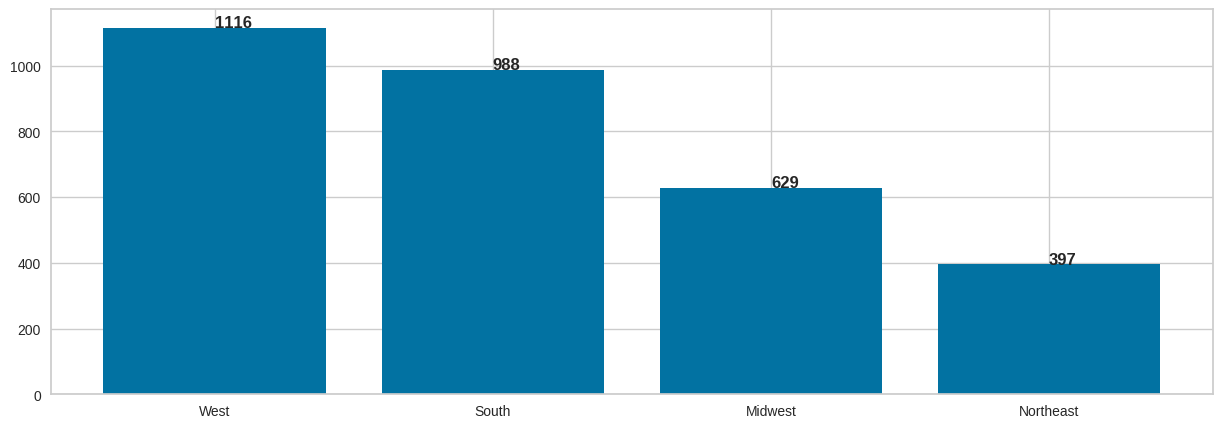

In [ ]:
fig = plt.figure(figsize =(15, 5))

K = sales_region.copy()

K.sort_values('Profit', ascending=False, inplace=True)
x = K['Region']
y = K['Profit']

#Add the data labels
for i, v in enumerate(y):
    vmil = round(v)
    plt.text(i, v, str(vmil), fontweight='bold')

plt.bar(x, y)   #Create the bar chart
plt.show()

# 1.2 Calculate sales performance by store

Menampilkan performa penjualan berdasarkan toko

In [ ]:
sales_store = df_eda.groupby(['StateCode'])['Profit'].count()
sales_store   = sales_store  .reset_index()
sales_store

StateCode  Profit
0         AL      38
1         AR       7
2         AZ      86
3         CA     692
4         CO     105
5         CT      85
6         DC       6
7         FL     205
8         GA      55
9         HI       5
10        IA      30
11        ID      10
12        IL     233
13        IN     111
14        KS      33
15        KY      22
16        LA      37
17        MA      40
18        MD      22
19        MI      50
20        MN      29
21        MO      37
22        MS       4
23        MT      10
24        NC      77
25        ND       9
26        NE      12
27        NH      11
28        NJ      60
29        NM      14
30        NV      59
31        NY     167
32        OH      55
33        OK      35
34        OR      38
35        PA      27
36        RI       7
37        SC      27
38        SD       3
39        TN      55
40        TX     329
41        UT      31
42        VA      69
43        WA      66
44        WI      27

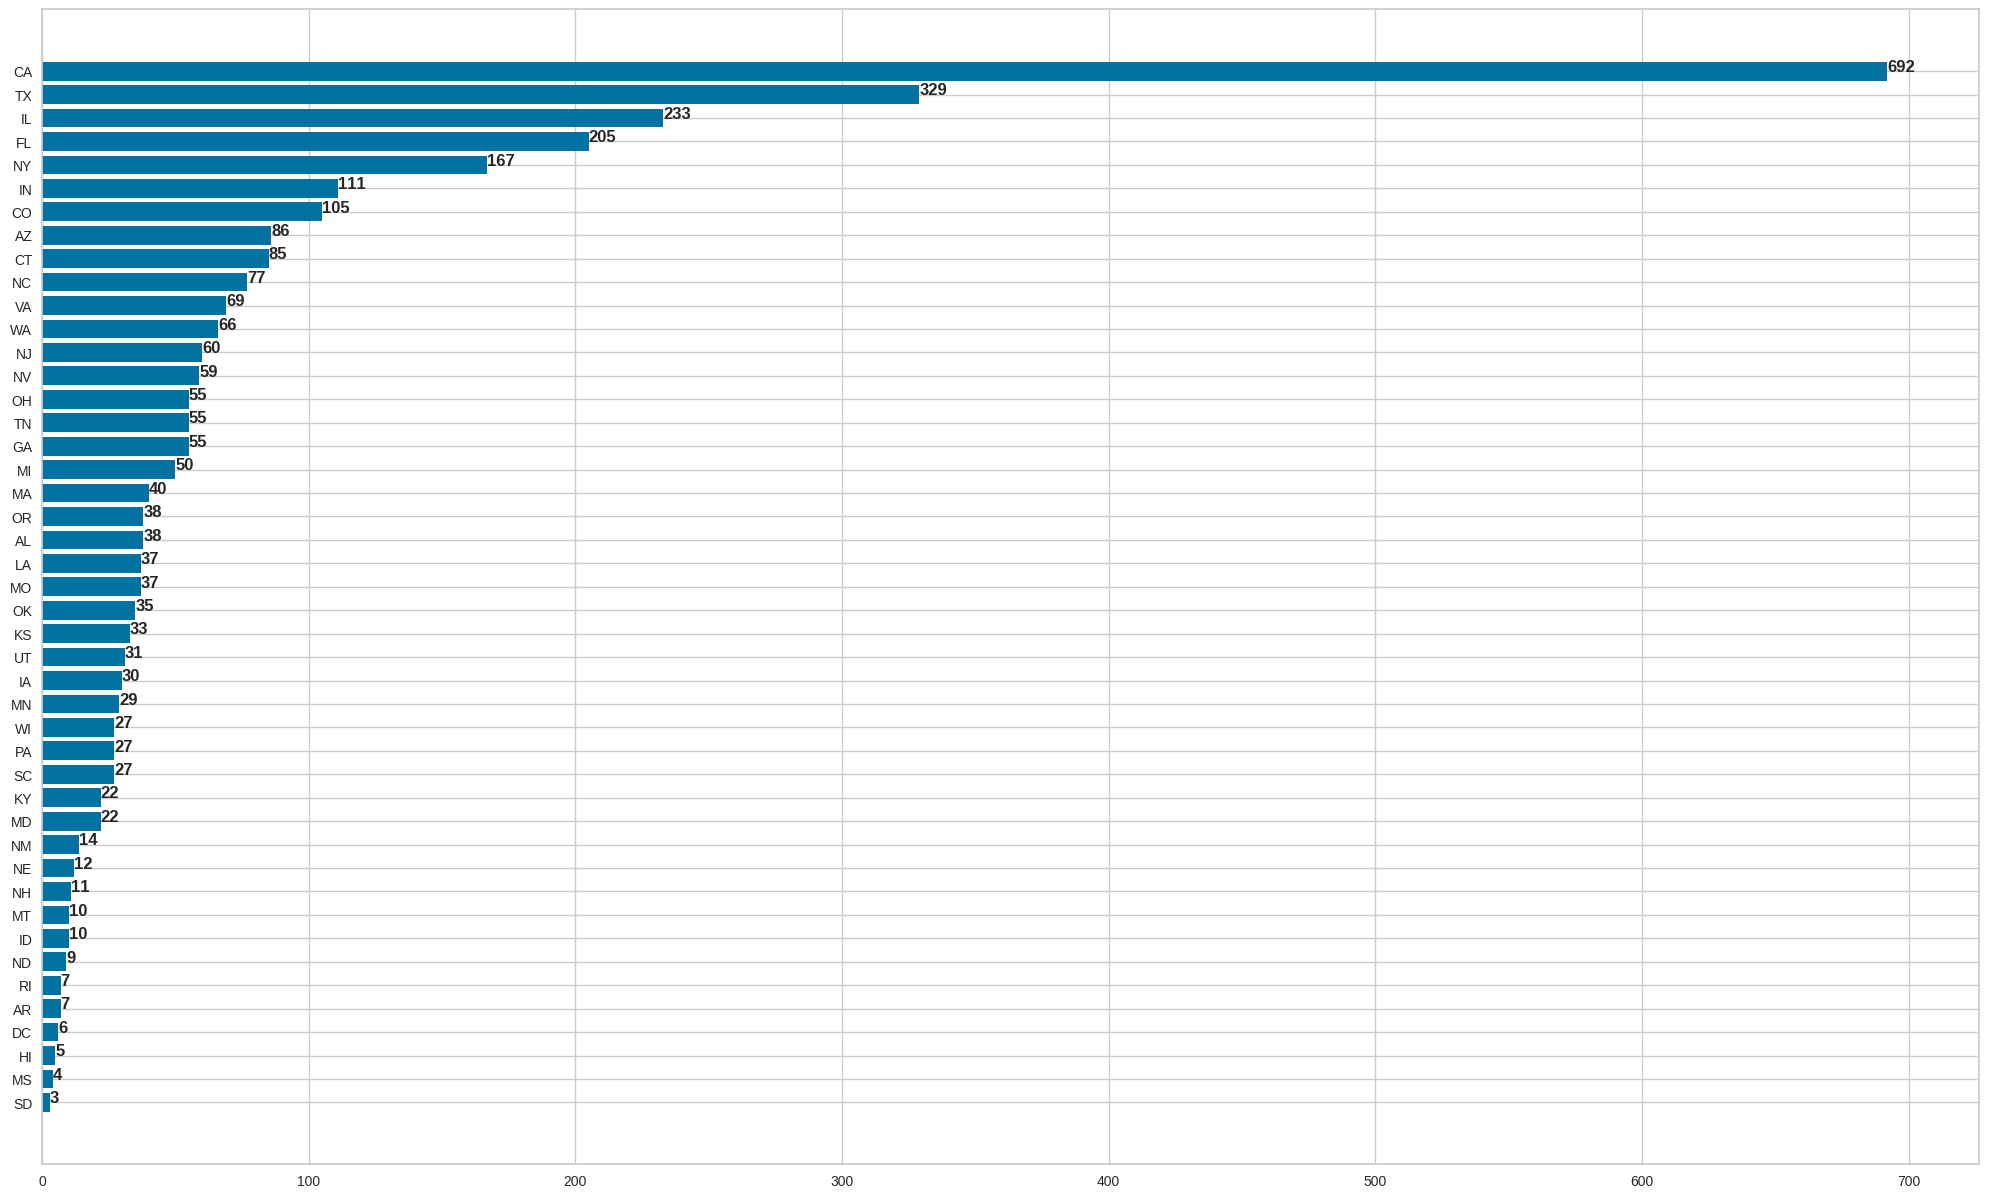

In [ ]:
fig = plt.figure(figsize =(25, 15))    #To create the canvas, figsize is showing size in inches (x,y)

K = sales_store.copy()

K.sort_values('Profit', ascending=True, inplace=True) #Sort the values descendingly
x = K['StateCode']    #assign the x
y = K['Profit']         #assign the y

plt.barh(x, y)  #Create the horizontal bar chart

#To show the data labels
for i, v in enumerate(y):                           #enumerate add numeric besides the data, example = (0, ‘value’)
    vmil = round(v)                                 #round the y
    plt.text(v, i, str(vmil), fontweight='bold')    #add text plt.text(x,y,s,fontweight = '')

plt.show()

# 2.1 Calculate product perfomance by region

Menampilkan performa produk berdasarkan wilayah

In [ ]:
sales_product = df_eda.groupby(['Product'])['Region'].count()
sales_product = sales_product  .reset_index()
sales_product

Product  Region
0          Accessories      70
1                Audio      56
2             Bakeware      73
3            Bar Tools      66
4             Baseball      63
5   Bathroom Furniture      74
6            Bean Bags      65
7    Bedroom Furniture      63
8             Blankets      58
9        Candleholders      62
10             Candles      66
11              Clocks      63
12    Cocktail Glasses      78
13        Collectibles      81
14           Computers      62
15            Cookware      63
16    Dining Furniture      67
17          Dinnerware      68
18             Festive     110
19         Floor Lamps      50
20              Floral      67
21  Furniture Cushions     133
22     Home Fragrances      69
23             Mirrors      69
24           Ornaments      65
25       Outdoor Decor      64
26   Outdoor Furniture      59
27            Pendants      63
28              Phones      75
29        Photo Frames      56
30            Platters      65
31                Rugs      61
32          Sculptures      65
33           Serveware      84
34            Stemware      76
35        TV and video      70
36         Table Lamps      61
37        Table Linens      70
38            Vanities      74
39               Vases      66
40      Wall Coverings      64
41         Wall Frames      79
42           Wardrobes      72
43        Wine Storage      66
44             Wreaths      79

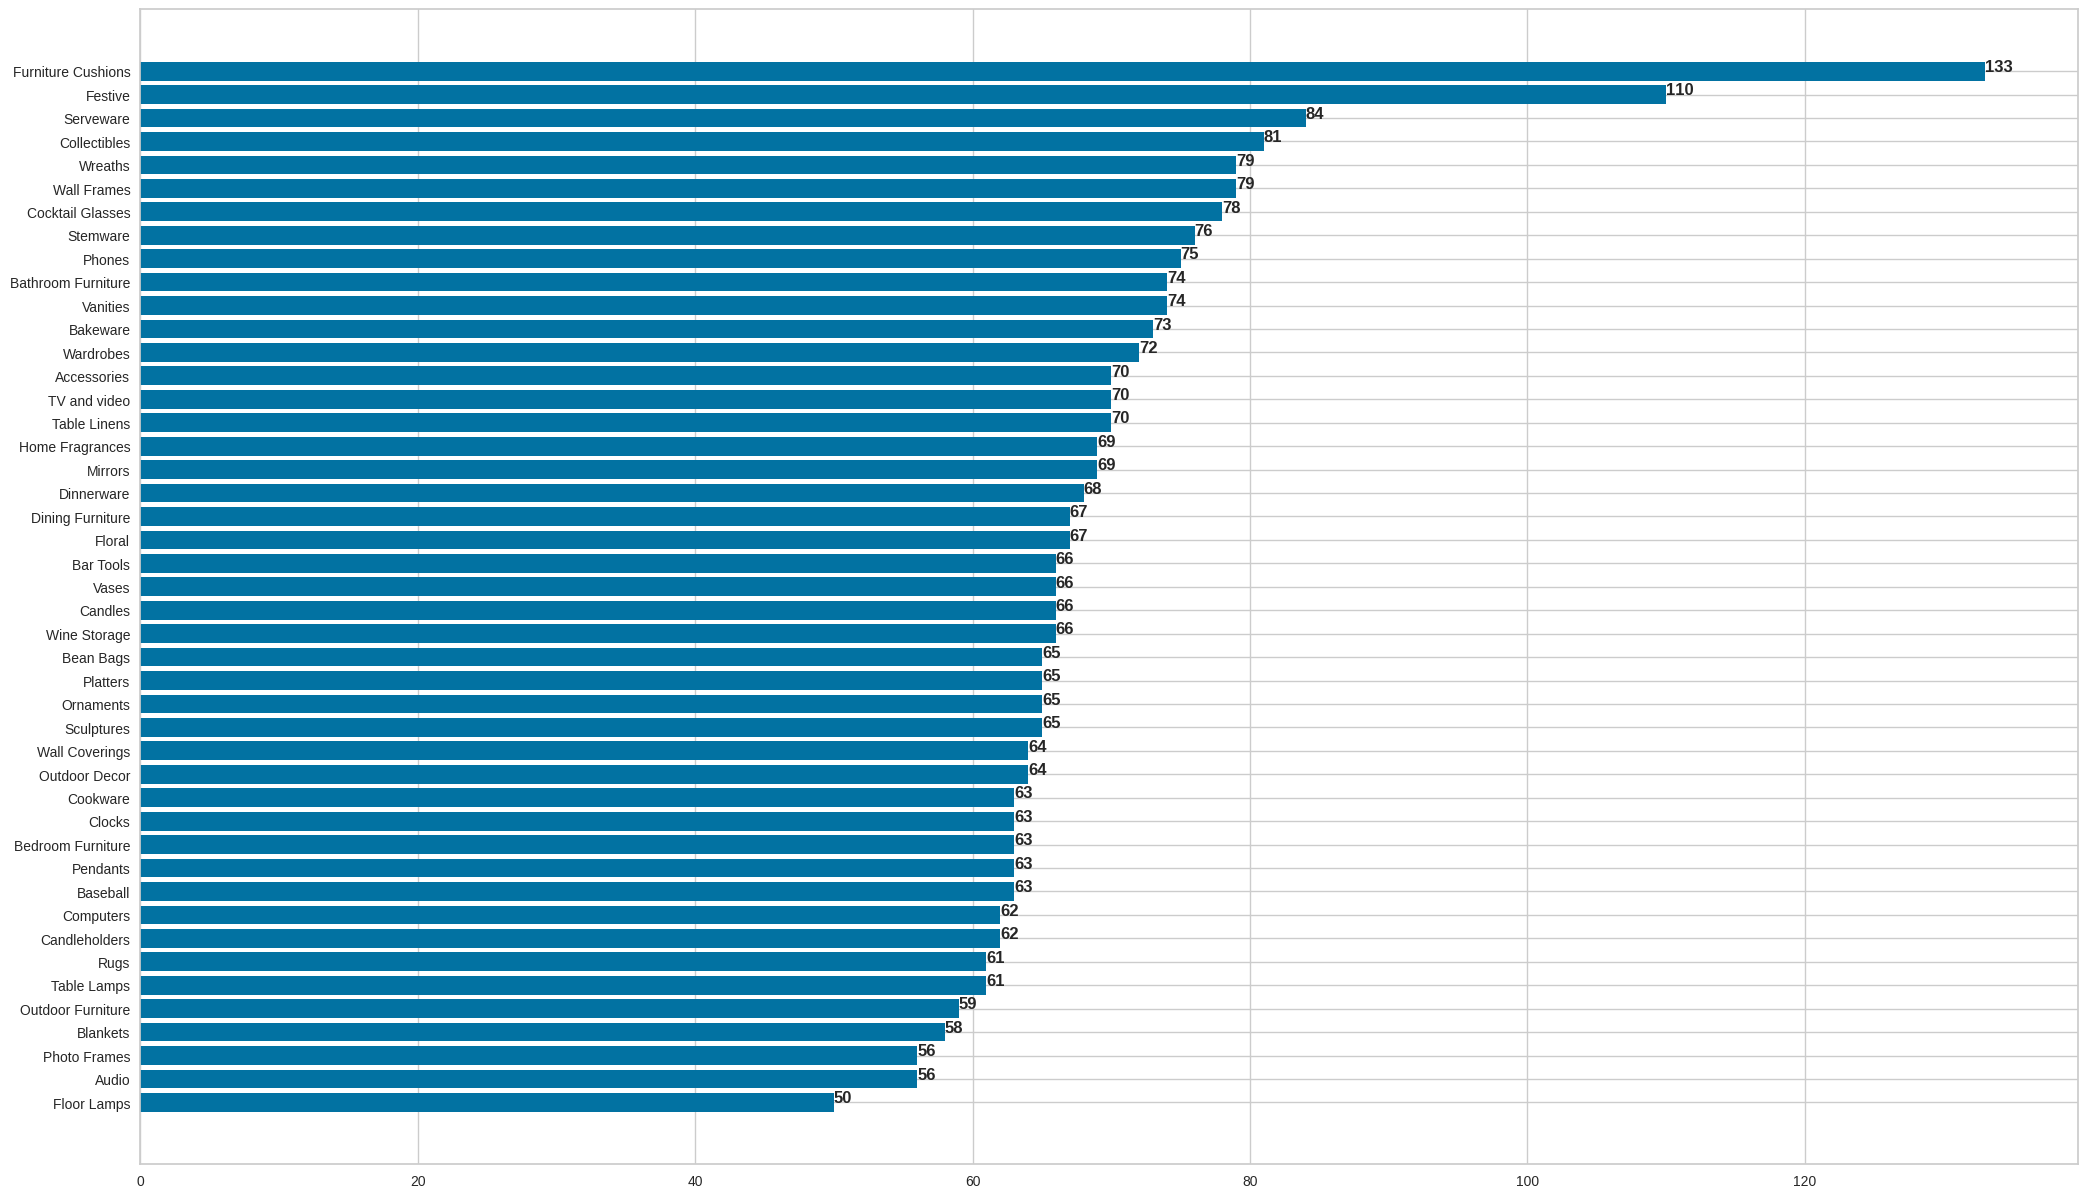

In [ ]:
fig = plt.figure(figsize =(25, 15))    #To create the canvas, figsize is showing size in inches (x,y)

K = sales_product.copy()

K.sort_values('Region', ascending=True, inplace=True) #Sort the values descendingly
x = K['Product']    #assign the x
y = K['Region']         #assign the y

plt.barh(x, y)  #Create the horizontal bar chart

#To show the data labels
for i, v in enumerate(y):                           #enumerate add numeric besides the data, example = (0, ‘value’)
    vmil = round(v)                                 #round the y
    plt.text(v, i, str(vmil), fontweight='bold')    #add text plt.text(x,y,s,fontweight = '')

plt.show()

## 2.2 Calculate Monthly Growth of Sales Based on Products

Menampilkan pertumbuhan penjualan berdasarkan range bulan dari penjualan produk

In [ ]:
sales_trend = df_eda[['DeliveryDate','Product']]    #Choose the variable wee need to make the chart
sales_trend['year_month'] = sales_trend['DeliveryDate'].dt.strftime('%Y/%m')   #Change the issue month into year,month format to get monthly data

sales_trend = sales_trend.sort_values('DeliveryDate')  #Sort the values by the issue month, ascending
sales_trend = sales_trend.groupby('year_month')['Product'].count() #sum the data and group it by the year_month
sales_trend = sales_trend.reset_index()
sales_trend.head()

<ipython-input-29-b3c5c3077c5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_trend['year_month'] = sales_trend['DeliveryDate'].dt.strftime('%Y/%m')   #Change the issue month into year,month format to get monthly data


year_month  Product
0    2020/01      267
1    2020/02      242
2    2020/03      269
3    2020/04      240
4    2020/05      263

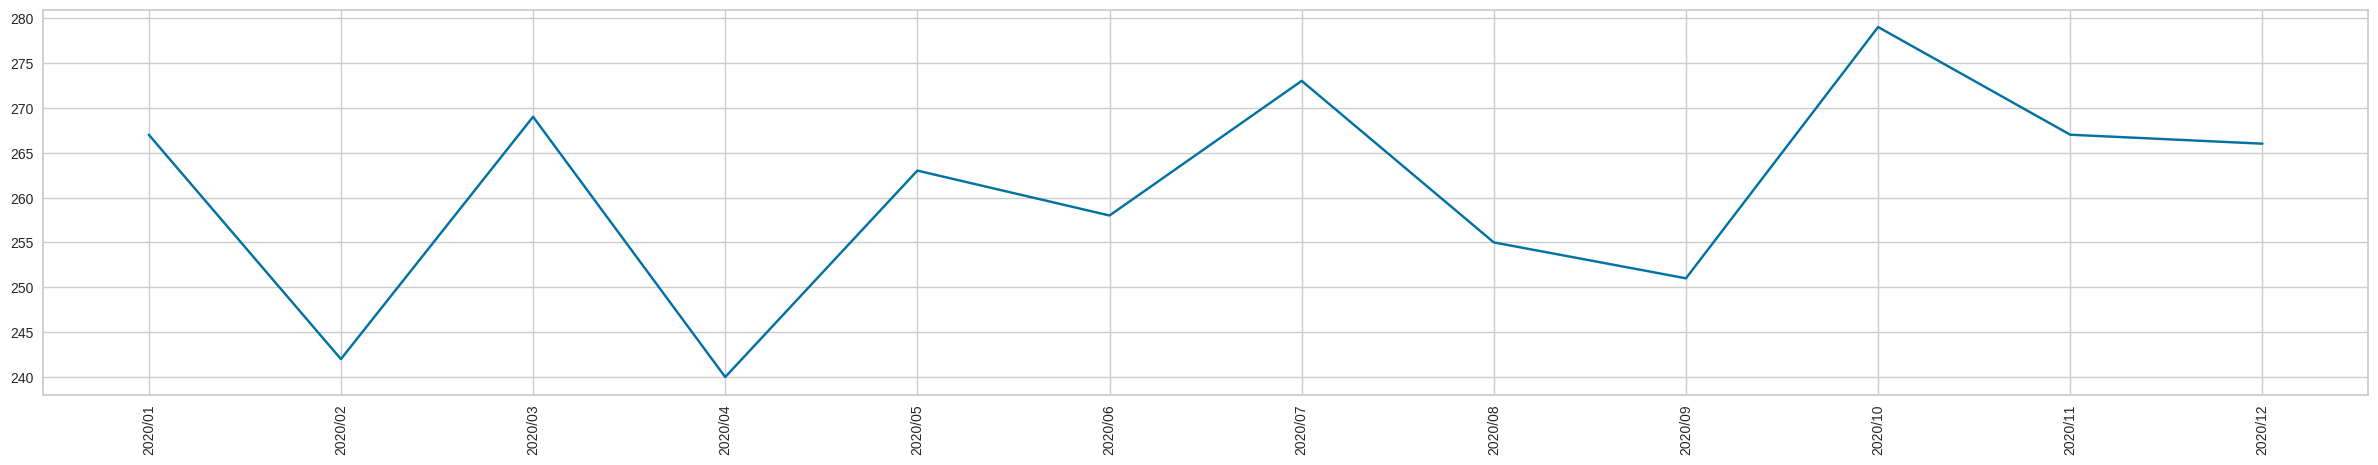

In [ ]:
plt.figure(figsize =(30, 5))

plt.xticks(rotation = 90)
plt.plot(sales_trend['year_month'], sales_trend['Product'])

plt.show()

## 2.3 Check The Corelation Between the Highest Sales Products With Profit Gnerated

ini banyak experiment saya yang mencobabeberapa metode ambil saja chart korelasi, untuk clustering saya cobatapi tidak relevant tidak usahdi ambil

In [ ]:
purpose_trend = df_eda[['DeliveryDate','Product','Profit']]    #Pick variable that wanted to be analyzed
purpose_trend['year_month'] = purpose_trend['DeliveryDate'].dt.strftime('%Y/%m')    #Change the format into year/month
purpose_trend.head()

<ipython-input-31-3b3c3dfb3d81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purpose_trend['year_month'] = purpose_trend['DeliveryDate'].dt.strftime('%Y/%m')    #Change the format into year/month


DeliveryDate             Product      Profit year_month
4623   2020-01-03             Festive   31141.178    2020/01
4624   2020-01-04            Bakeware   22517.755    2020/01
4625   2020-01-02  Furniture Cushions     392.977    2020/01
4628   2020-01-01             Festive    9414.528    2020/01
4630   2020-01-09         Table Lamps  106608.544    2020/01

In [ ]:
purpose_trend.info()    #Check the issue month data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3130 entries, 4623 to 7934
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DeliveryDate  3130 non-null   datetime64[ns]
 1   Product       3130 non-null   object        
 2   Profit        3130 non-null   float64       
 3   year_month    3130 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 122.3+ KB


In [ ]:
purpose_trend = purpose_trend[['year_month','Product','Profit']]    #Change the column order for pivoting
purpose_trend.head(1)

year_month  Product     Profit
4623    2020/01  Festive  31141.178

In [ ]:
#Change the purpose into a column using pivot
purpose_trend_pivot = purpose_trend.pivot_table(index = 'year_month', columns='Product', values = 'Profit',aggfunc = 'sum') #Pivot the table and sum if there is a duplicate found
purpose_trend_pivot = purpose_trend_pivot.reset_index()
purpose_trend_pivot.head()

Product year_month  Accessories         Audio      Bakeware     Bar Tools  \
0          2020/01  379688.2090  540410.13175  352030.04750  194260.74400   
1          2020/02  413936.3400  203324.82325  397755.54175   85758.19400   
2          2020/03  338286.0275   26848.62450   56435.54625  233258.93100   
3          2020/04  316178.3935   71077.88800  264073.78100  343457.40600   
4          2020/05   15192.5920  224543.72650   80930.35900  378469.28275   

Product     Baseball  Bathroom Furniture    Bean Bags  Bedroom Furniture  \
0         21091.5000        632141.47100  105935.4120        47309.01600   
1        207885.6875        235097.09800  258339.4975       297707.48200   
2         88354.7855        255681.39800  504568.2765       106604.90625   
3        346011.1670        118066.22975  144922.3465       122231.73700   
4        198899.2840           302.57450  276747.9660       380544.20100   

Product      Blankets  ...  TV and video  Table Lamps  Table Linens  \
0        106844.24800  ...  546662.99175  255018.6660   428918.2815   
1        408423.51750  ...  361804.76000   38792.9085   111731.2635   
2        191558.76925  ...  107961.35425  270716.1480    87894.3145   
3         52064.89100  ...  231822.20700  155754.4715   129784.8580   
4        144715.87750  ...  263551.23125  125349.7990   197393.2560   

Product      Vanities         Vases  Wall Coverings   Wall Frames  \
0        632447.62750  292039.16475    463156.71300  142561.84800   
1        216158.53625  276491.94150    407102.50950  586479.94150   
2        165623.33400    1068.75000    287244.86750  180476.78825   
3         23235.06200  213381.60700    585614.11825  330368.27775   
4        343631.12975  226213.84800    302393.82625  267849.36500   

Product     Wardrobes  Wine Storage      Wreaths  
0        231602.43400  199700.19300   25846.8145  
1        222290.81200  181938.95550    6853.7655  
2        300521.93200  598047.73950  376405.9240  
3        209793.33600  312834.20475  343022.7965  
4        363291.36225  229506.21825  160703.6085  

[5 rows x 46 columns]

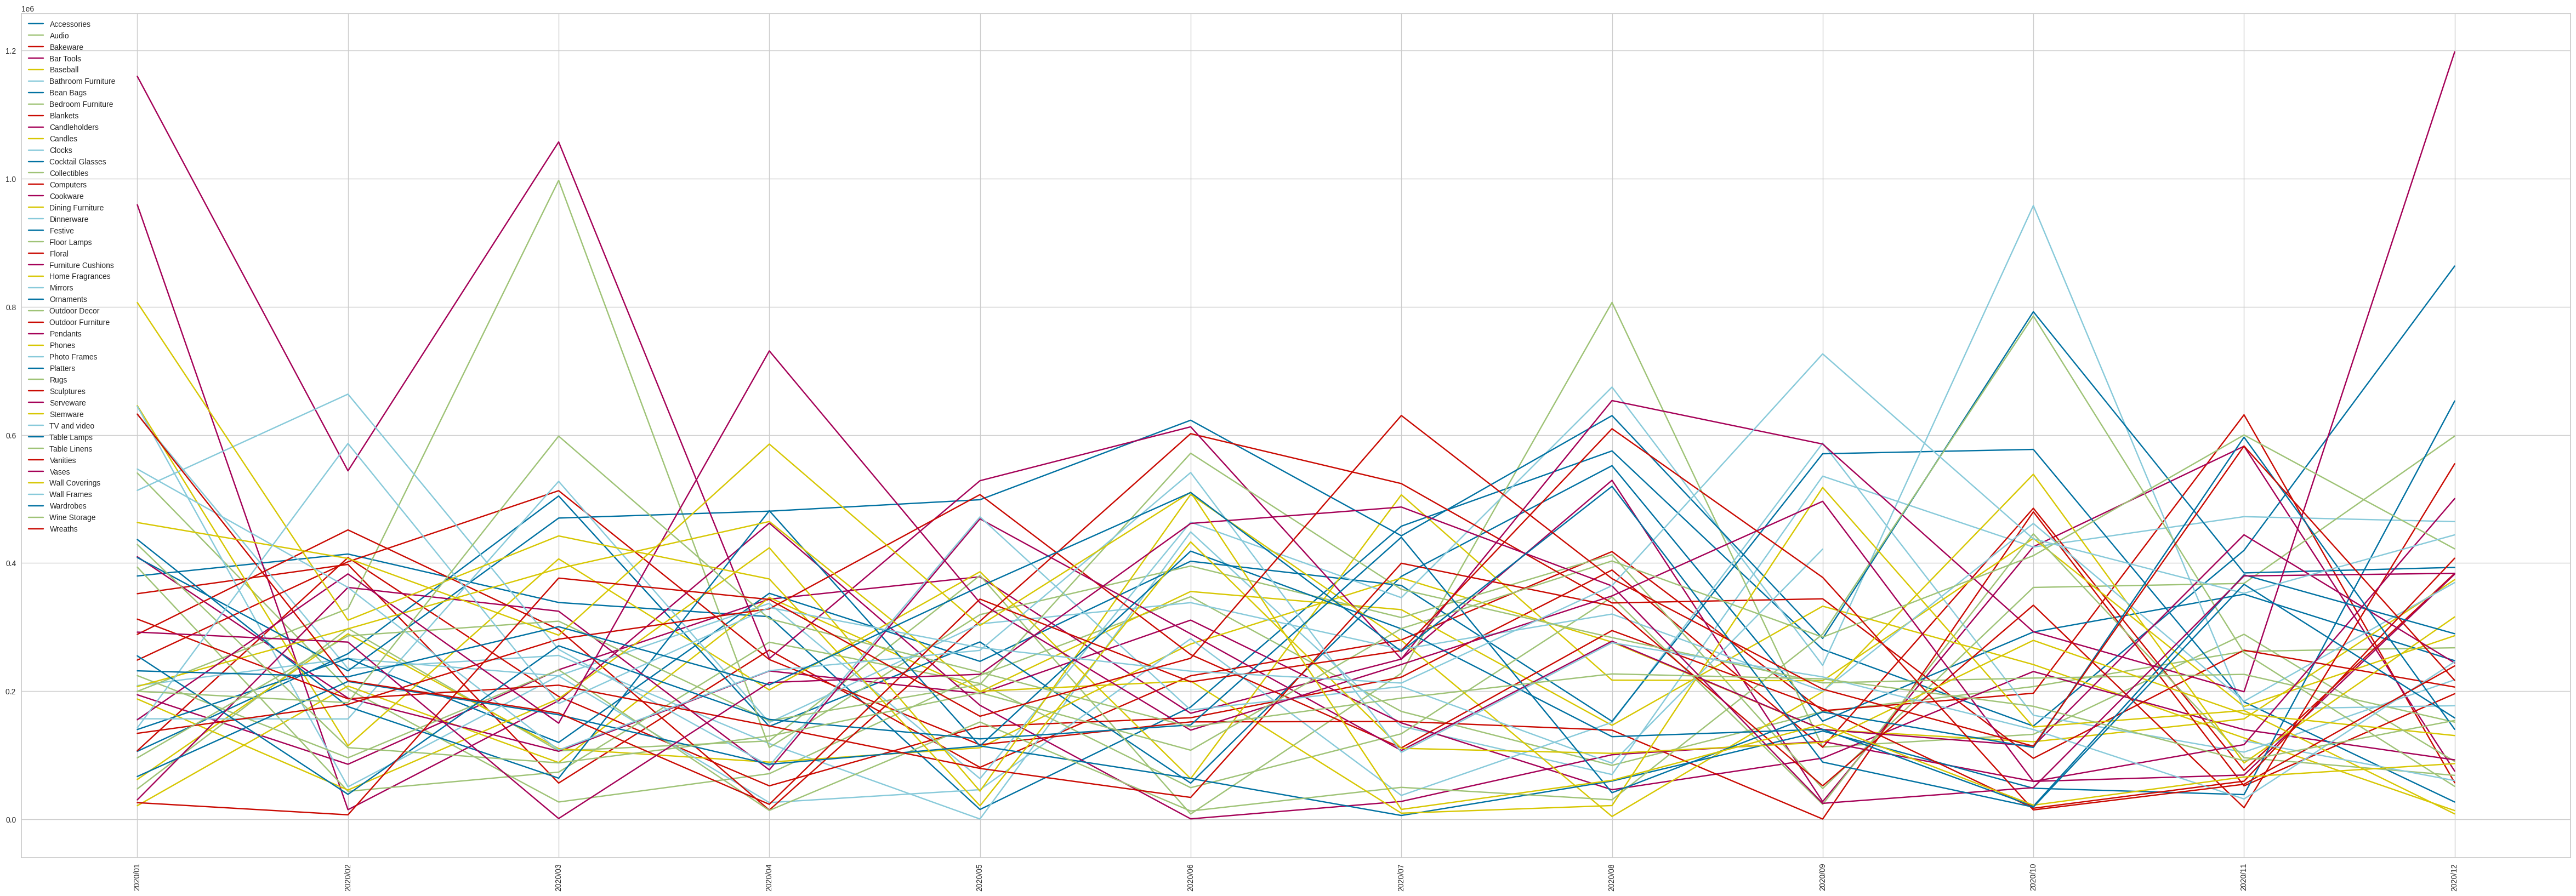

In [ ]:
#Create line chart
plt.figure(figsize =(60, 20))
axis = purpose_trend_pivot.columns.tolist()
#axis.head()

for x in axis[1:]:
  plt.plot(purpose_trend_pivot['year_month'], purpose_trend_pivot[x])

plt.xticks(rotation = 90)
plt.legend(purpose_trend_pivot.iloc[:,1:],loc = 2)

plt.show()

### Chart korelasi

In [ ]:
# CLUSTER
from sklearn.cluster import KMeans                                             # to perform the k-means algorithm
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     # to sacalling different attribute
from sklearn import cluster                                                    # for machine learning and statistical modelling (we use it for clustering)

import matplotlib.cm as cm                                                     # provide a large set of colormaps(cm)
from sklearn.metrics import silhouette_samples, silhouette_score               # for perform silhoutte analysis

In [ ]:
#df_segmentation_feature = df_eda[['OrderNumber','Product', 'Profit']]
#df_segmentation_feature

In [ ]:
#sns.scatterplot(data = df_eda, x='Profit', y='Product')

In [ ]:
#df_eda.plot.scatter(x='Profit', y='Product')

<ipython-input-40-e707a3bd8746>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriks_korelasi = df_eda.corr()


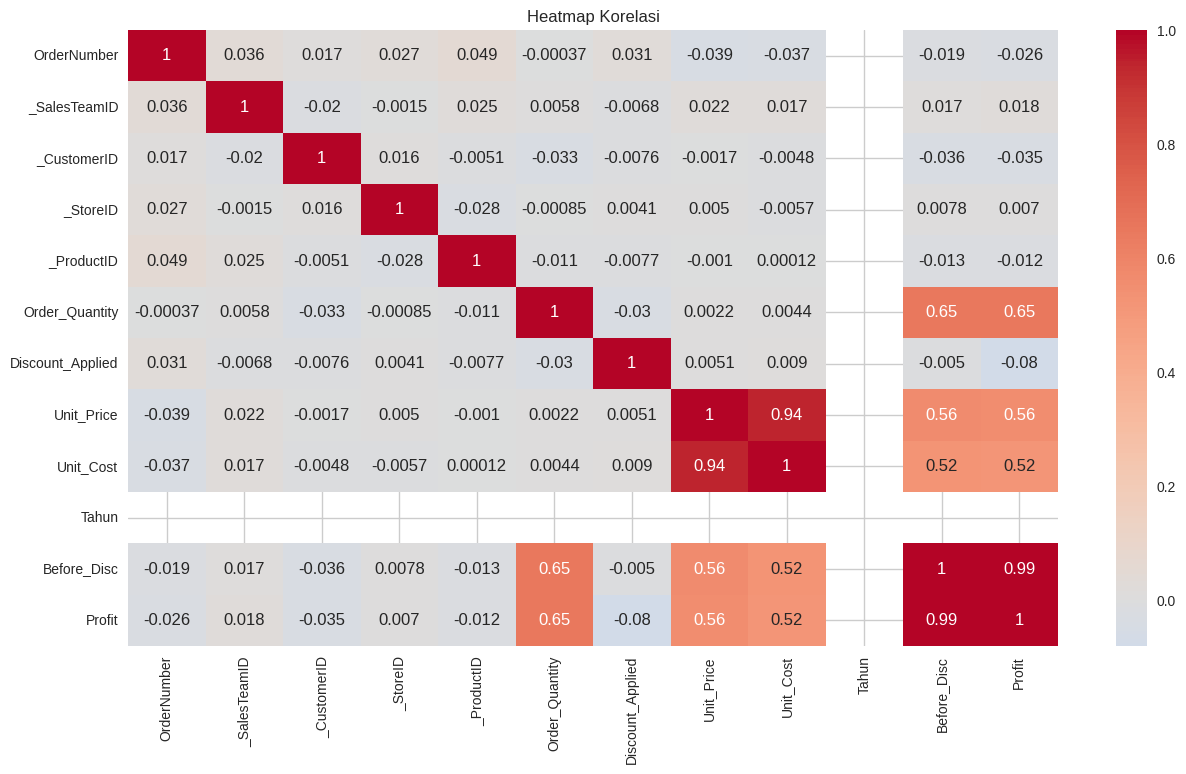

In [ ]:
# Hitung matriks korelasi
matriks_korelasi = df_eda.corr()

# Buat heatmap untuk matriks korelasi
plt.figure(figsize=(15, 8))
sns.heatmap(matriks_korelasi, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap Korelasi')

plt.show()

In [ ]:
df_segmentation_feature1 = df_eda[['Order_Quantity', 'Profit']]
df_segmentation_feature1

Order_Quantity        Profit
4623               4   31141.17800
4624               5   22517.75500
4625               1     392.97700
4628               4    9414.52800
4630               7  106608.54400
...              ...           ...
7904               8  162523.87200
7912               3   14388.73575
7916               7   50625.83400
7928               6  103297.71000
7934               8   11589.19200

[3130 rows x 2 columns]

In [ ]:
# Define Standard Scale dataset
ss_scale_df = df_segmentation_feature1.copy()
column = ['Order_Quantity','Profit']
# using StandardScaler Scaler
ss_scaler = StandardScaler()
ss_scale_df[column] = ss_scaler.fit_transform(ss_scale_df[column])

<Axes: xlabel='Order_Quantity', ylabel='Profit'>

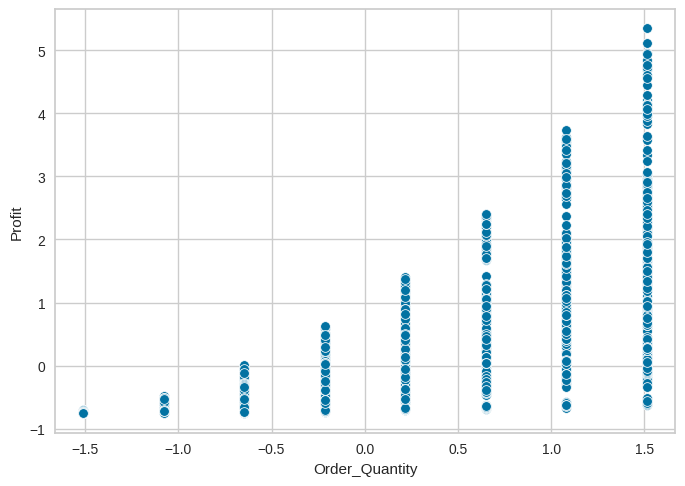

In [ ]:
sns.scatterplot (data = ss_scale_df, x='Order_Quantity', y='Profit')

In [ ]:
ss_scale_df[['Order_Quantity', 'Profit']].head()

Order_Quantity    Profit
4623       -0.214387 -0.245199
4624        0.217422 -0.387387
4625       -1.509817 -0.752192
4628       -0.214387 -0.603440
4630        1.081042  0.999145

In [ ]:
# Define Robust Scale dataset
rs_scale_df = df_segmentation_feature1.copy()
column = df_segmentation_feature1.columns.to_list()
# using RobustScaler Scaler
rs_scaler = RobustScaler()
rs_scale_df[['Order_Quantity', 'Profit']] = rs_scaler.fit_transform(rs_scale_df[['Order_Quantity', 'Profit']])

<Axes: xlabel='Order_Quantity', ylabel='Profit'>

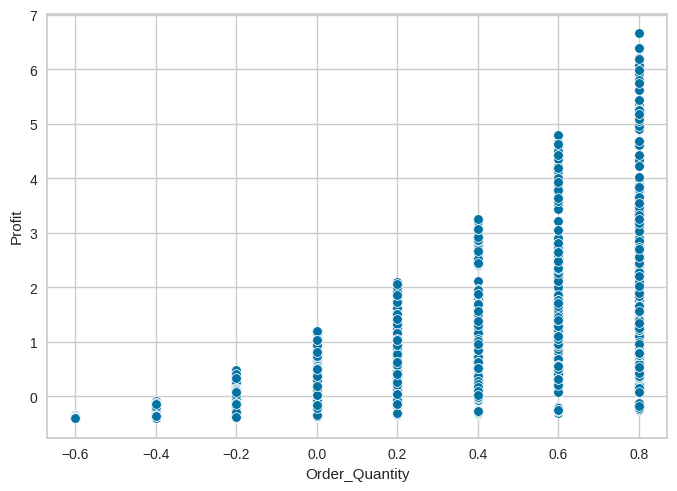

In [ ]:
sns.scatterplot (data = rs_scale_df, x='Order_Quantity', y='Profit')

In [ ]:
# Define Minmax Scale dataset
mm_scale_df1 = df_segmentation_feature1.copy()
column = df_segmentation_feature1.columns.to_list()
# using Minmax Scaler
mm_scaler = MinMaxScaler()
mm_scale_df1[['Order_Quantity', 'Profit']] = mm_scaler.fit_transform(mm_scale_df1[['Order_Quantity', 'Profit']])

<Axes: xlabel='Order_Quantity', ylabel='Profit'>

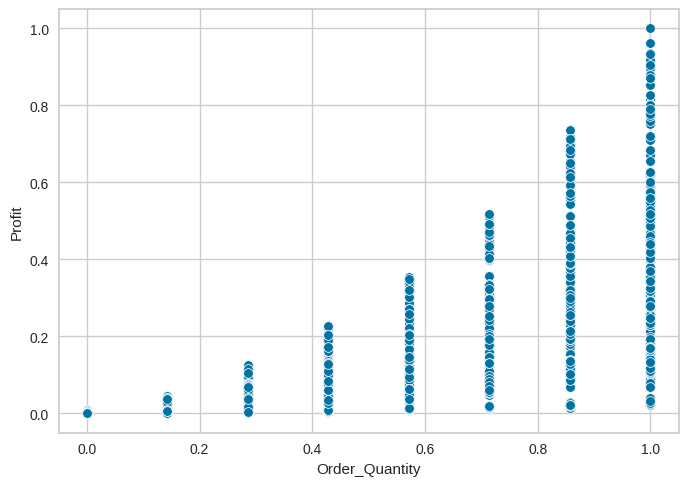

In [ ]:
sns.scatterplot (data = mm_scale_df1, x='Order_Quantity', y='Profit')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

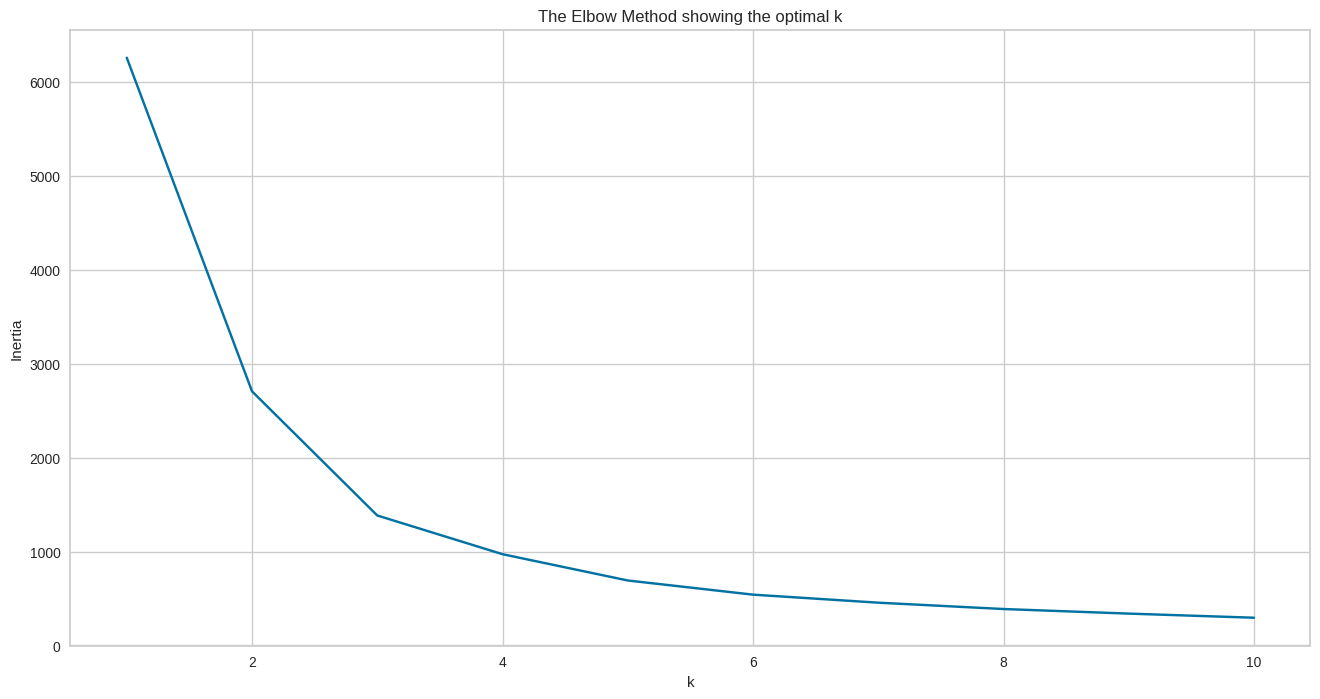

[6260.000000000005, 2706.3325493585417, 1383.965772681352, 971.5813581595824, 691.5369805511427, 540.66193952239, 455.1575312532097, 387.6253747231149, 338.7509644690275, 294.9516469033995]


In [ ]:
# K-Means Clustering
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++')
    kmeanModel.fit(ss_scale_df)  #---------------------Ini yang diganti
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

In [ ]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, init = 'k-means++')
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.5264280433891637


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.533281871318774


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.4856559376086913


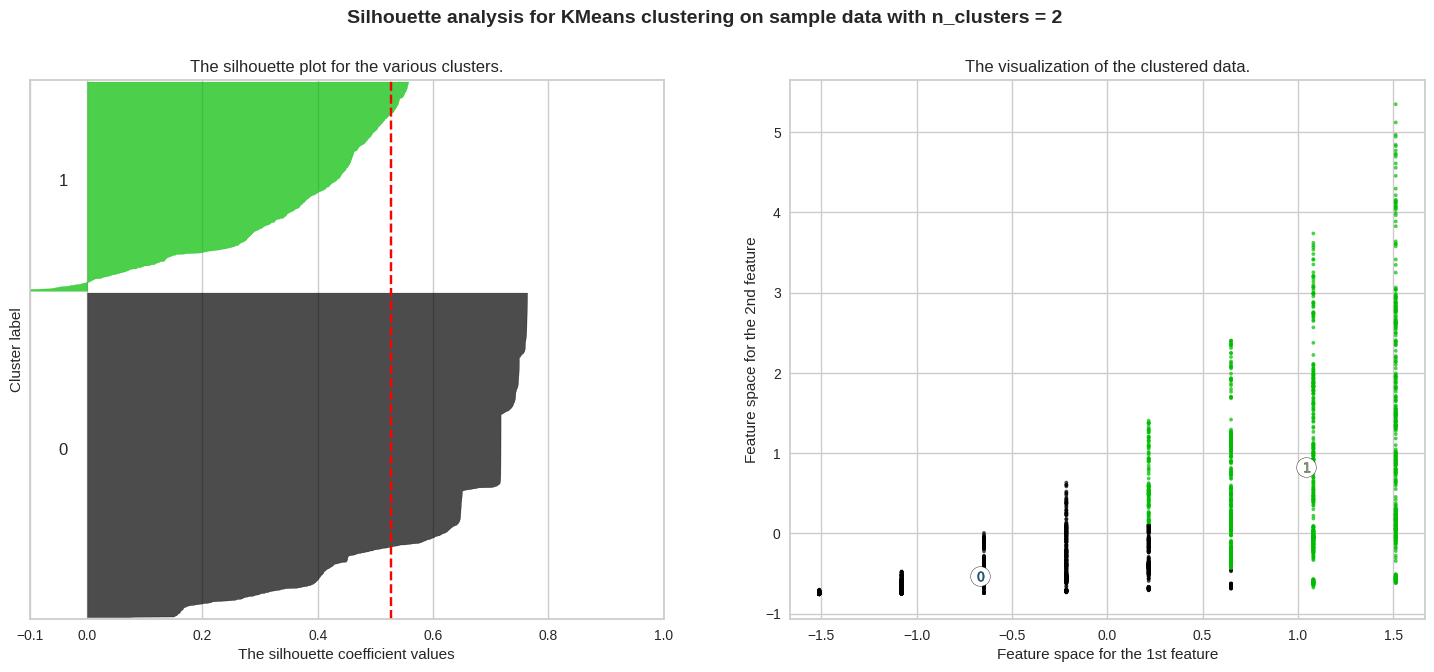

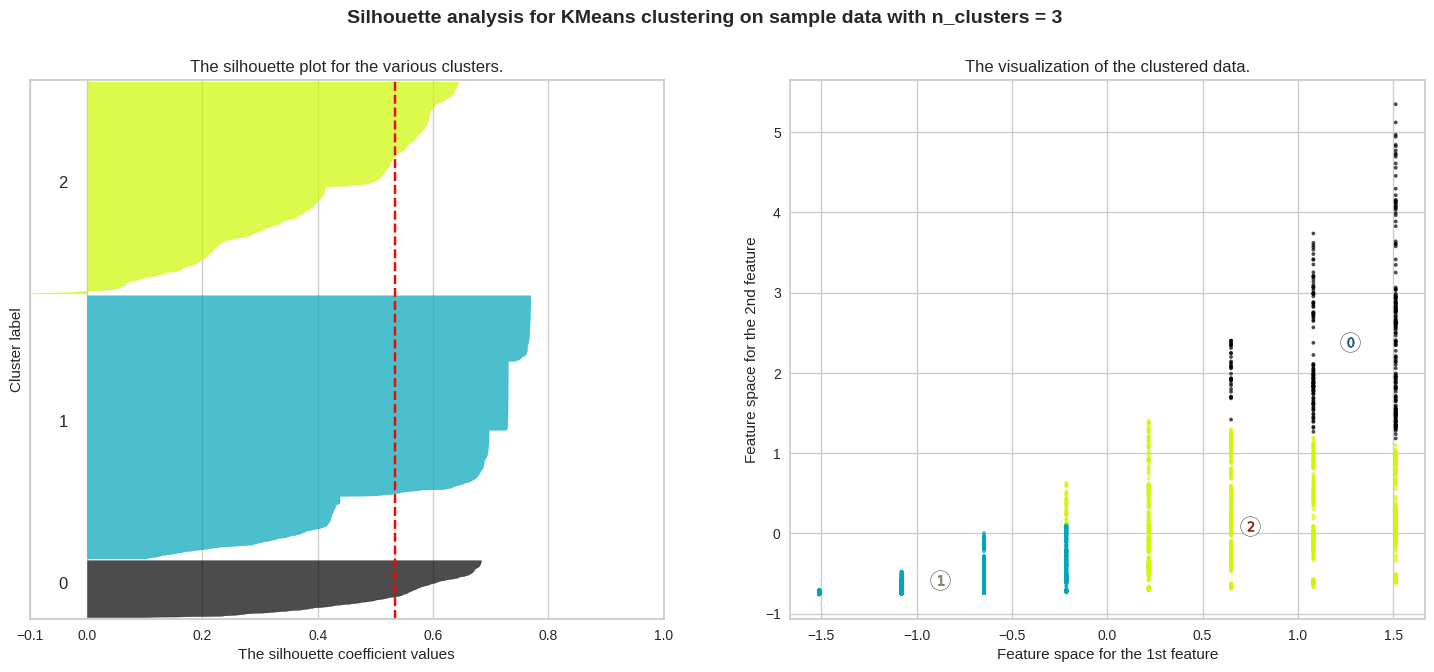

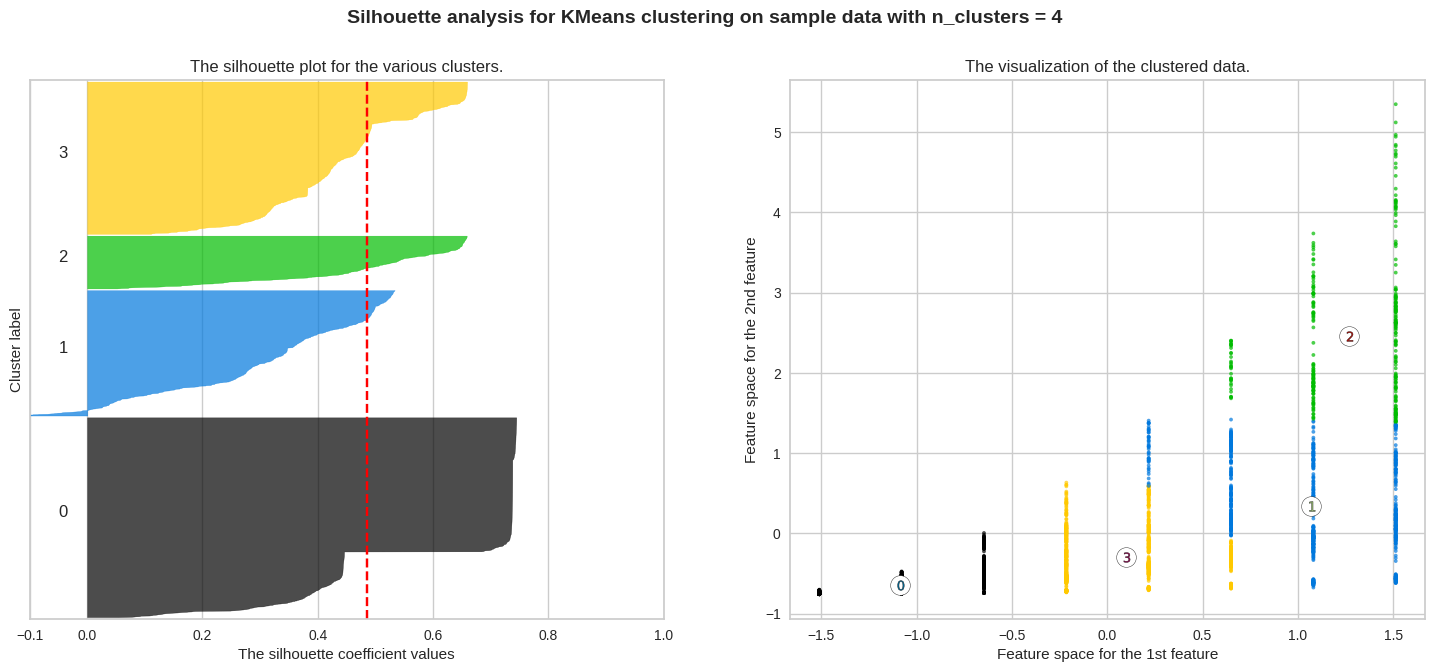

In [ ]:
silhoutte_analysis(ss_scale_df[['Order_Quantity', 'Profit']],list(range(2,5)))

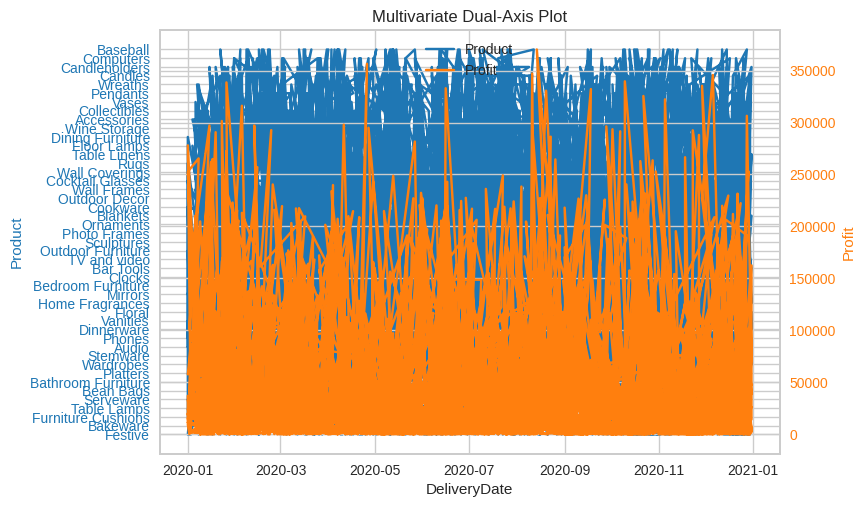

In [ ]:
# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Plot the first variable on the first y-axis (left)
ax1.plot(df_eda['DeliveryDate'], df_eda['Product'], color='tab:blue', label='Product')
ax1.set_xlabel('DeliveryDate')
ax1.set_ylabel('Product', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a twin Axes sharing the x-axis
ax2 = ax1.twinx()

# Plot the second and third variables on the second y-axis (right)
ax2.plot(df_eda['DeliveryDate'], df_eda['Profit'], color='tab:orange', label='Profit')
#ax2.plot(df_eda['DeliveryDate'], df_eda['year_month'], color='tab:green', label='Variable3')
ax2.set_ylabel('Profit', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Combine the legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.title('Multivariate Dual-Axis Plot')
plt.show()



In [ ]:
sales_trend = df_eda[['DeliveryDate','Product']]    #Choose the variable wee need to make the chart
sales_trend['year_month'] = sales_trend['DeliveryDate'].dt.strftime('%Y/%m')   #Change the issue month into year,month format to get monthly data

sales_trend = sales_trend.sort_values('DeliveryDate')  #Sort the values by the issue month, ascending
sales_trend = sales_trend.groupby('year_month')['Product'].count() #sum the data and group it by the year_month
sales_trend = sales_trend.reset_index()
sales_trend.head()

<ipython-input-53-b3c5c3077c5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_trend['year_month'] = sales_trend['DeliveryDate'].dt.strftime('%Y/%m')   #Change the issue month into year,month format to get monthly data


year_month  Product
0    2020/01      267
1    2020/02      242
2    2020/03      269
3    2020/04      240
4    2020/05      263

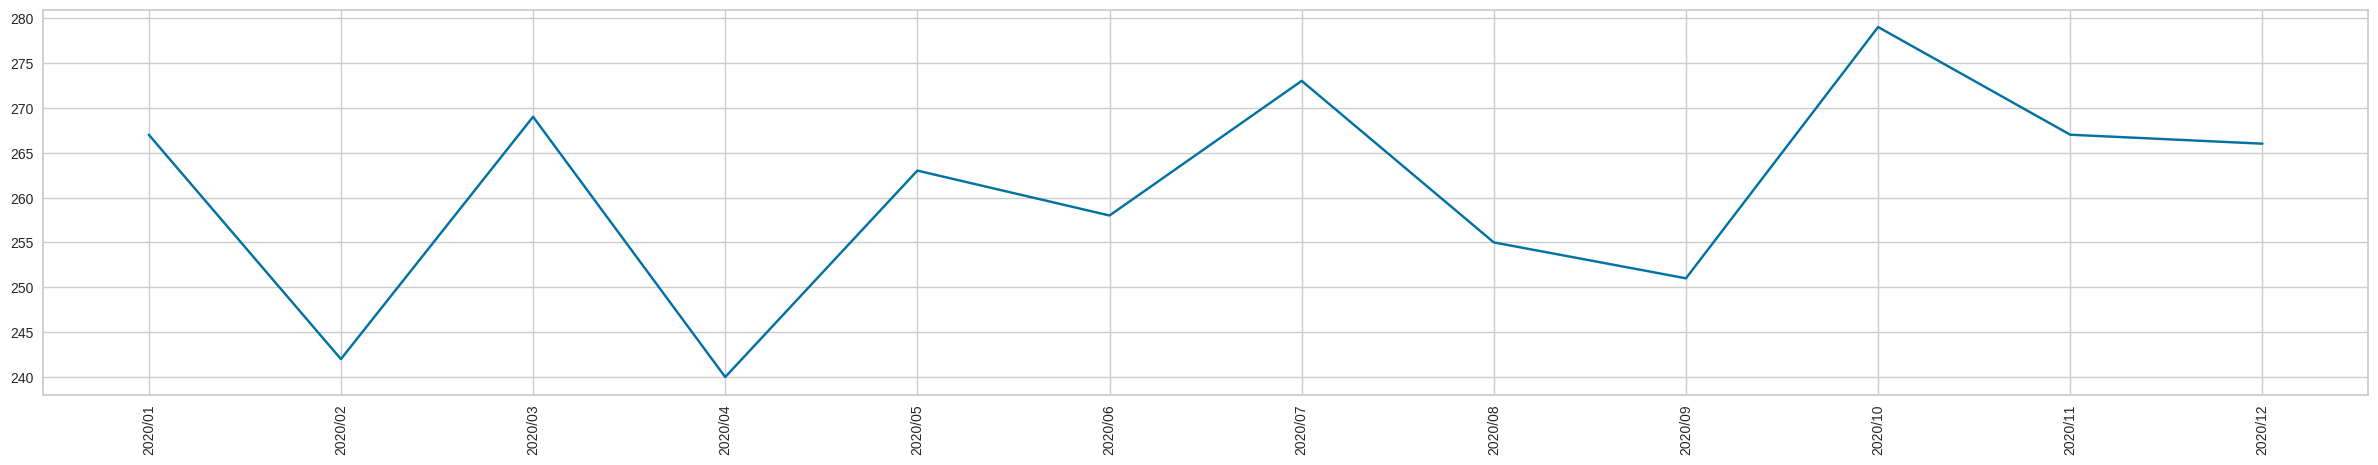

In [ ]:
plt.figure(figsize =(30, 5))

plt.xticks(rotation = 90)
plt.plot(sales_trend['year_month'], sales_trend['Product'])

plt.show()

In [ ]:
sales_trend = df_eda[['DeliveryDate','Profit']]    #Choose the variable wee need to make the chart
sales_trend['year_month'] = sales_trend['DeliveryDate'].dt.strftime('%Y/%m')   #Change the issue month into year,month format to get monthly data

sales_trend = sales_trend.sort_values('DeliveryDate')  #Sort the values by the issue month, ascending
sales_trend = sales_trend.groupby('year_month')['Profit'].count() #sum the data and group it by the year_month
sales_trend = sales_trend.reset_index()
sales_trend.head()

<ipython-input-55-7f26d4ddbe78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_trend['year_month'] = sales_trend['DeliveryDate'].dt.strftime('%Y/%m')   #Change the issue month into year,month format to get monthly data


year_month  Profit
0    2020/01     267
1    2020/02     242
2    2020/03     269
3    2020/04     240
4    2020/05     263

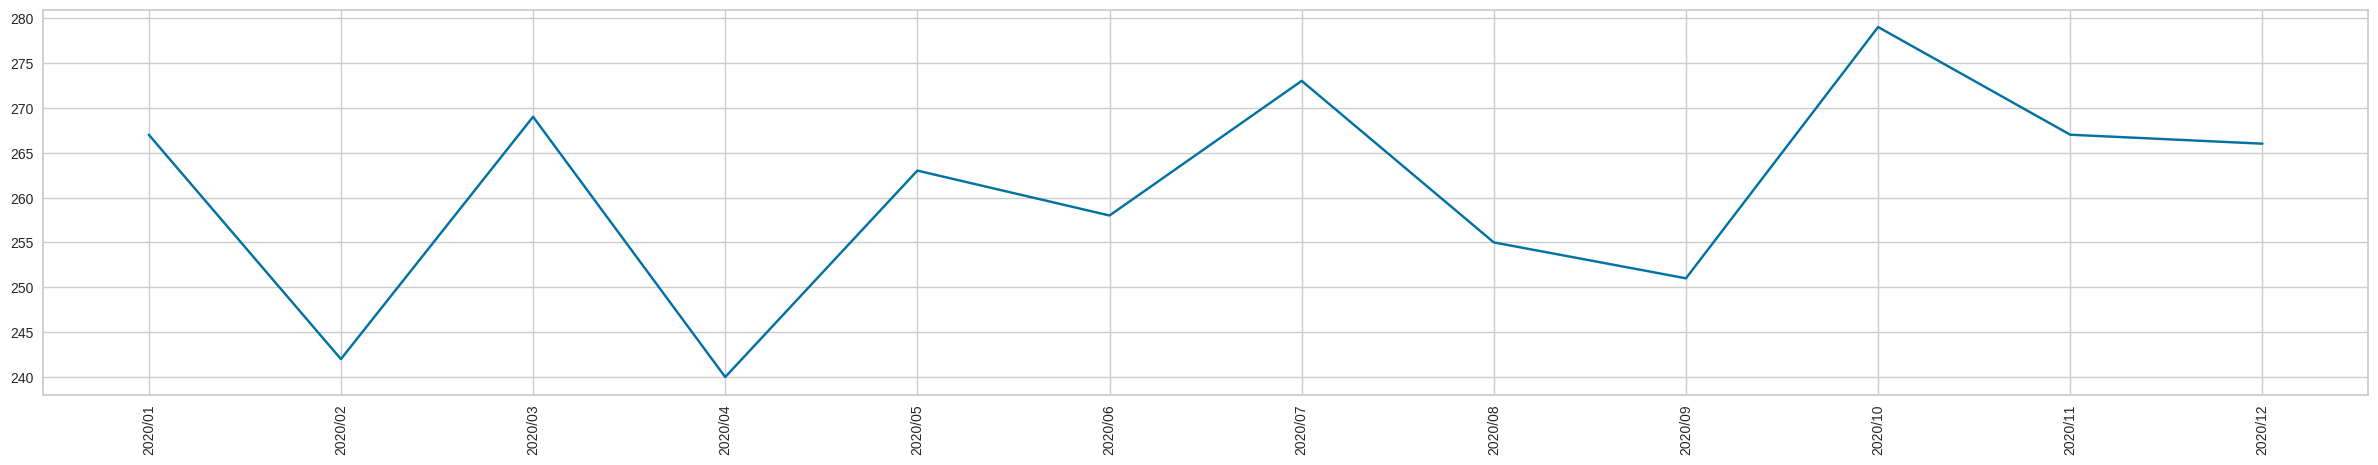

In [ ]:
plt.figure(figsize =(30, 5))

plt.xticks(rotation = 90)
plt.plot(sales_trend['year_month'], sales_trend['Profit'])
plt.show()

In [ ]:
#sales_quantity = df_eda.groupby(['Product'])['Order_Quantity'].count()
#sales_quantity = sales_quantity .reset_index()
#sales_quantity

sales_quantity = df_eda[['DeliveryDate','Order_Quantity']]    #Choose the variable wee need to make the chart
sales_quantity['year_month'] = sales_quantity['DeliveryDate'].dt.strftime('%Y/%m')   #Change the issue month into year,month format to get monthly data

sales_quantity = sales_quantity.sort_values('DeliveryDate')  #Sort the values by the issue month, ascending
sales_quantity = sales_quantity.groupby('year_month')['Order_Quantity'].count() #sum the data and group it by the year_month
sales_quantity = sales_quantity.reset_index()
sales_quantity.head()

<ipython-input-57-8d34a3d3ae79>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_quantity['year_month'] = sales_quantity['DeliveryDate'].dt.strftime('%Y/%m')   #Change the issue month into year,month format to get monthly data


year_month  Order_Quantity
0    2020/01             267
1    2020/02             242
2    2020/03             269
3    2020/04             240
4    2020/05             263

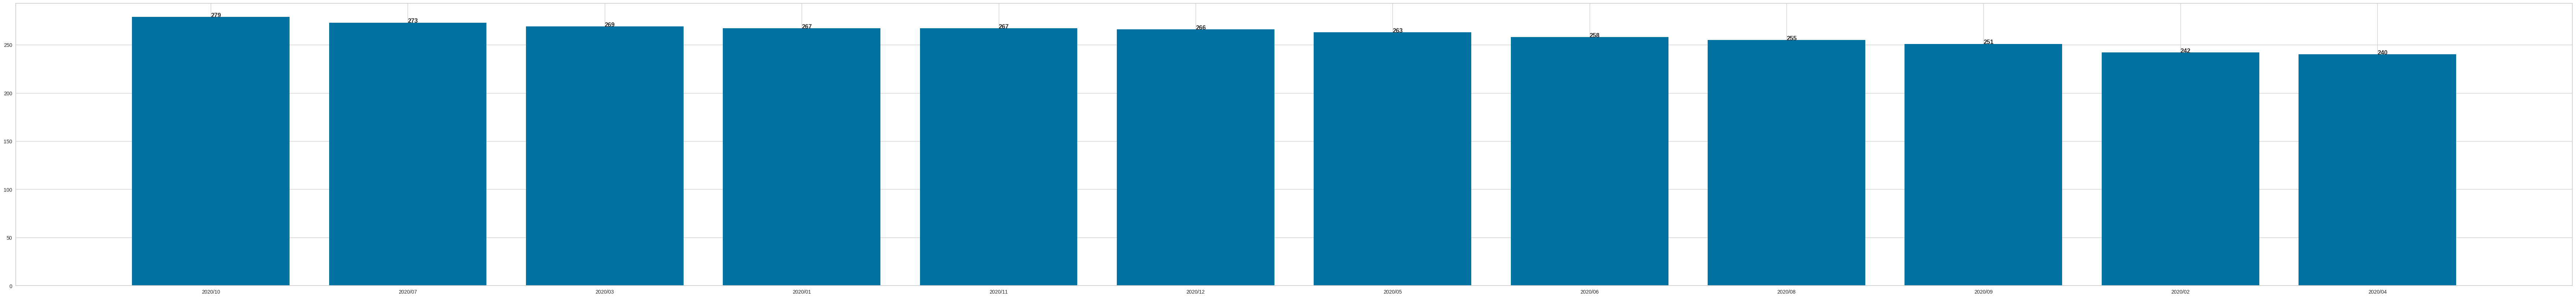

In [ ]:
fig = plt.figure(figsize =(90, 10))

K = sales_quantity.copy()

K.sort_values('Order_Quantity', ascending=False, inplace=True)
x = K['year_month']
y = K['Order_Quantity']

#Add the data labels
for i, v in enumerate(y):
    vmil = round(v)
    plt.text(i, v, str(vmil), fontweight='bold')

plt.bar(x, y)   #Create the bar chart
plt.show()

In [ ]:
#sales_profit = df_eda.groupby(['Product'])['Profit'].count()
#sales_profit = sales_profit .reset_index()
#sales_profit

sales_profit = df_eda[['DeliveryDate','Profit']]    #Choose the variable wee need to make the chart
sales_profit['year_month'] = sales_profit['DeliveryDate'].dt.strftime('%Y/%m')   #Change the issue month into year,month format to get monthly data

sales_profit = sales_profit.sort_values('DeliveryDate')  #Sort the values by the issue month, ascending
sales_profit = sales_profit.groupby('year_month')['Profit'].count() #sum the data and group it by the year_month
sales_profit = sales_profit.reset_index()
sales_profit.head()

<ipython-input-59-3df5d409cb70>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_profit['year_month'] = sales_profit['DeliveryDate'].dt.strftime('%Y/%m')   #Change the issue month into year,month format to get monthly data


year_month  Profit
0    2020/01     267
1    2020/02     242
2    2020/03     269
3    2020/04     240
4    2020/05     263

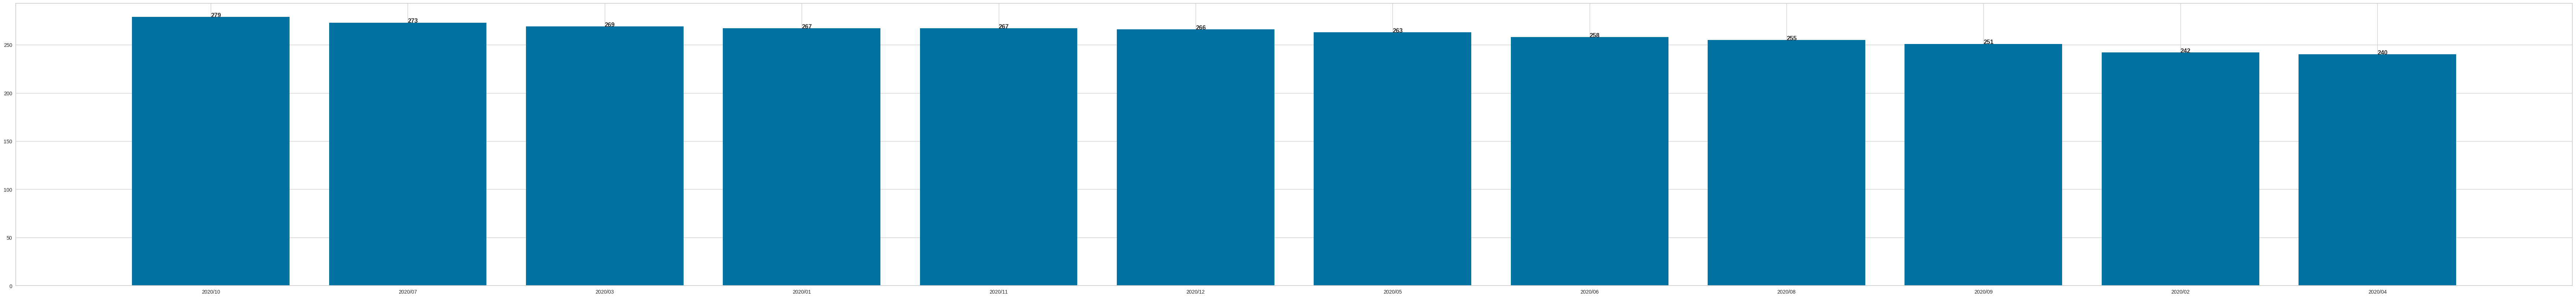

In [ ]:
fig = plt.figure(figsize =(90, 10))

K = sales_profit.copy()

K.sort_values('Profit', ascending=False, inplace=True)
x = K['year_month']
y = K['Profit']

#Add the data labels
for i, v in enumerate(y):
    vmil = round(v)
    plt.text(i, v, str(vmil), fontweight='bold')

plt.bar(x, y)   #Create the bar chart
plt.show()

In [ ]:
# overview corraletion matrix included all columns
correlation_matrix = df_eda.corr()
correlation_matrix

<ipython-input-61-6ea78b29532d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_eda.corr()


OrderNumber  _SalesTeamID  _CustomerID  _StoreID  \
OrderNumber          1.000000      0.036147     0.016874  0.026801   
_SalesTeamID         0.036147      1.000000    -0.020481 -0.001493   
_CustomerID          0.016874     -0.020481     1.000000  0.015508   
_StoreID             0.026801     -0.001493     0.015508  1.000000   
_ProductID           0.048544      0.025246    -0.005095 -0.027589   
Order_Quantity      -0.000368      0.005781    -0.032652 -0.000849   
Discount_Applied     0.031076     -0.006814    -0.007613  0.004100   
Unit_Price          -0.039240      0.022112    -0.001666  0.004950   
Unit_Cost           -0.037069      0.017438    -0.004821 -0.005655   
Tahun                     NaN           NaN          NaN       NaN   
Before_Disc         -0.019119      0.017070    -0.036010  0.007798   
Profit              -0.026446      0.018382    -0.035121  0.006960   

                  _ProductID  Order_Quantity  Discount_Applied  Unit_Price  \
OrderNumber         0.048544       -0.000368          0.031076   -0.039240   
_SalesTeamID        0.025246        0.005781         -0.006814    0.022112   
_CustomerID        -0.005095       -0.032652         -0.007613   -0.001666   
_StoreID           -0.027589       -0.000849          0.004100    0.004950   
_ProductID          1.000000       -0.011402         -0.007718   -0.001024   
Order_Quantity     -0.011402        1.000000         -0.030380    0.002178   
Discount_Applied   -0.007718       -0.030380          1.000000    0.005146   
Unit_Price         -0.001024        0.002178          0.005146    1.000000   
Unit_Cost           0.000119        0.004445          0.009036    0.941625   
Tahun                    NaN             NaN               NaN         NaN   
Before_Disc        -0.012657        0.652960         -0.004972    0.561907   
Profit             -0.012390        0.650045         -0.079840    0.557465   

                  Unit_Cost  Tahun  Before_Disc    Profit  
OrderNumber       -0.037069    NaN    -0.019119 -0.026446  
_SalesTeamID       0.017438    NaN     0.017070  0.018382  
_CustomerID       -0.004821    NaN    -0.036010 -0.035121  
_StoreID          -0.005655    NaN     0.007798  0.006960  
_ProductID         0.000119    NaN    -0.012657 -0.012390  
Order_Quantity     0.004445    NaN     0.652960  0.650045  
Discount_Applied   0.009036    NaN    -0.004972 -0.079840  
Unit_Price         0.941625    NaN     0.561907  0.557465  
Unit_Cost          1.000000    NaN     0.523781  0.519136  
Tahun                   NaN    NaN          NaN       NaN  
Before_Disc        0.523781    NaN     1.000000  0.992223  
Profit             0.519136    NaN     0.992223  1.000000

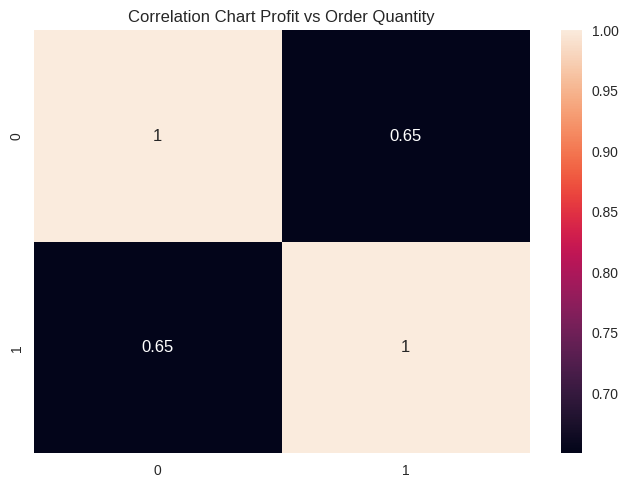

In [ ]:
x = df_eda['Order_Quantity']
y = df_eda['Profit']

correlation_matrix = np.corrcoef(x,y) # Create a correlation matrix

sns.heatmap(correlation_matrix, annot=True) # Create a heatmap of the correlation matrix

plt.title("Correlation Chart Profit vs Order Quantity") # Add a title to the plot

plt.show()

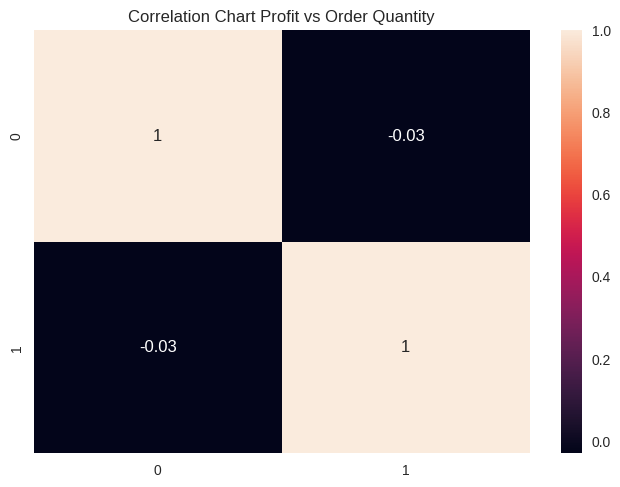

In [ ]:
x = df_eda['Order_Quantity']
y = df_eda['Discount_Applied']

correlation_matrix = np.corrcoef(x,y) # Create a correlation matrix

sns.heatmap(correlation_matrix, annot=True) # Create a heatmap of the correlation matrix

plt.title("Correlation Chart Profit vs Order Quantity") # Add a title to the plot

plt.show()

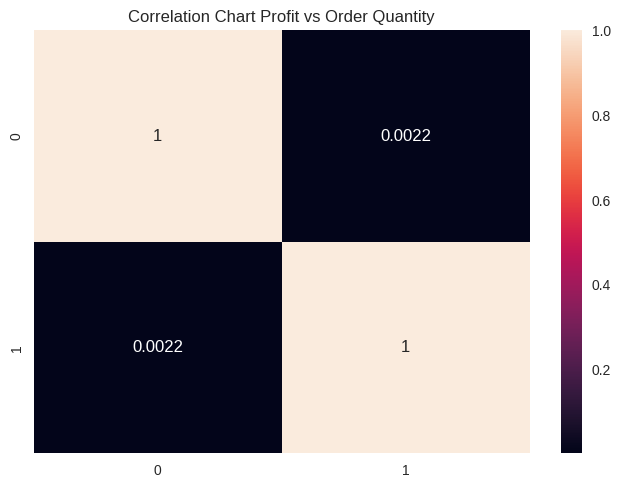

In [ ]:
x = df_eda['Order_Quantity']
y = df_eda['Unit_Price']

correlation_matrix = np.corrcoef(x,y) # Create a correlation matrix

sns.heatmap(correlation_matrix, annot=True) # Create a heatmap of the correlation matrix

plt.title("Correlation Chart Profit vs Order Quantity") # Add a title to the plot

plt.show()

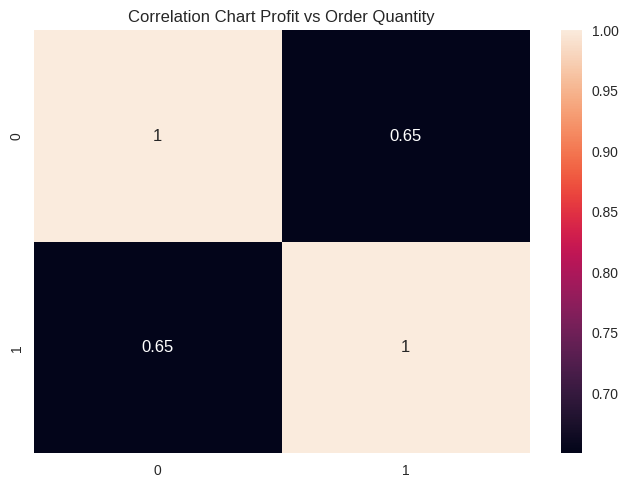

In [ ]:
x = df_eda['Order_Quantity']
y = df_eda['Profit']

correlation_matrix = np.corrcoef(x,y) # Create a correlation matrix

sns.heatmap(correlation_matrix, annot=True) # Create a heatmap of the correlation matrix

plt.title("Correlation Chart Profit vs Order Quantity") # Add a title to the plot

plt.show()

# 3.1 Calculate the Stock-Out of Time of Each Product

Melihat chart data penjualan sehingga dapat menyimpulkan stok slow / fast moving untuk melihat insight produksi di tahun 2021

In [ ]:
sales_product = df_eda.groupby(['Product'])['Order_Quantity'].count()
sales_product   = sales_product  .reset_index()
sales_product

Product  Order_Quantity
0          Accessories              70
1                Audio              56
2             Bakeware              73
3            Bar Tools              66
4             Baseball              63
5   Bathroom Furniture              74
6            Bean Bags              65
7    Bedroom Furniture              63
8             Blankets              58
9        Candleholders              62
10             Candles              66
11              Clocks              63
12    Cocktail Glasses              78
13        Collectibles              81
14           Computers              62
15            Cookware              63
16    Dining Furniture              67
17          Dinnerware              68
18             Festive             110
19         Floor Lamps              50
20              Floral              67
21  Furniture Cushions             133
22     Home Fragrances              69
23             Mirrors              69
24           Ornaments              65
25       Outdoor Decor              64
26   Outdoor Furniture              59
27            Pendants              63
28              Phones              75
29        Photo Frames              56
30            Platters              65
31                Rugs              61
32          Sculptures              65
33           Serveware              84
34            Stemware              76
35        TV and video              70
36         Table Lamps              61
37        Table Linens              70
38            Vanities              74
39               Vases              66
40      Wall Coverings              64
41         Wall Frames              79
42           Wardrobes              72
43        Wine Storage              66
44             Wreaths              79

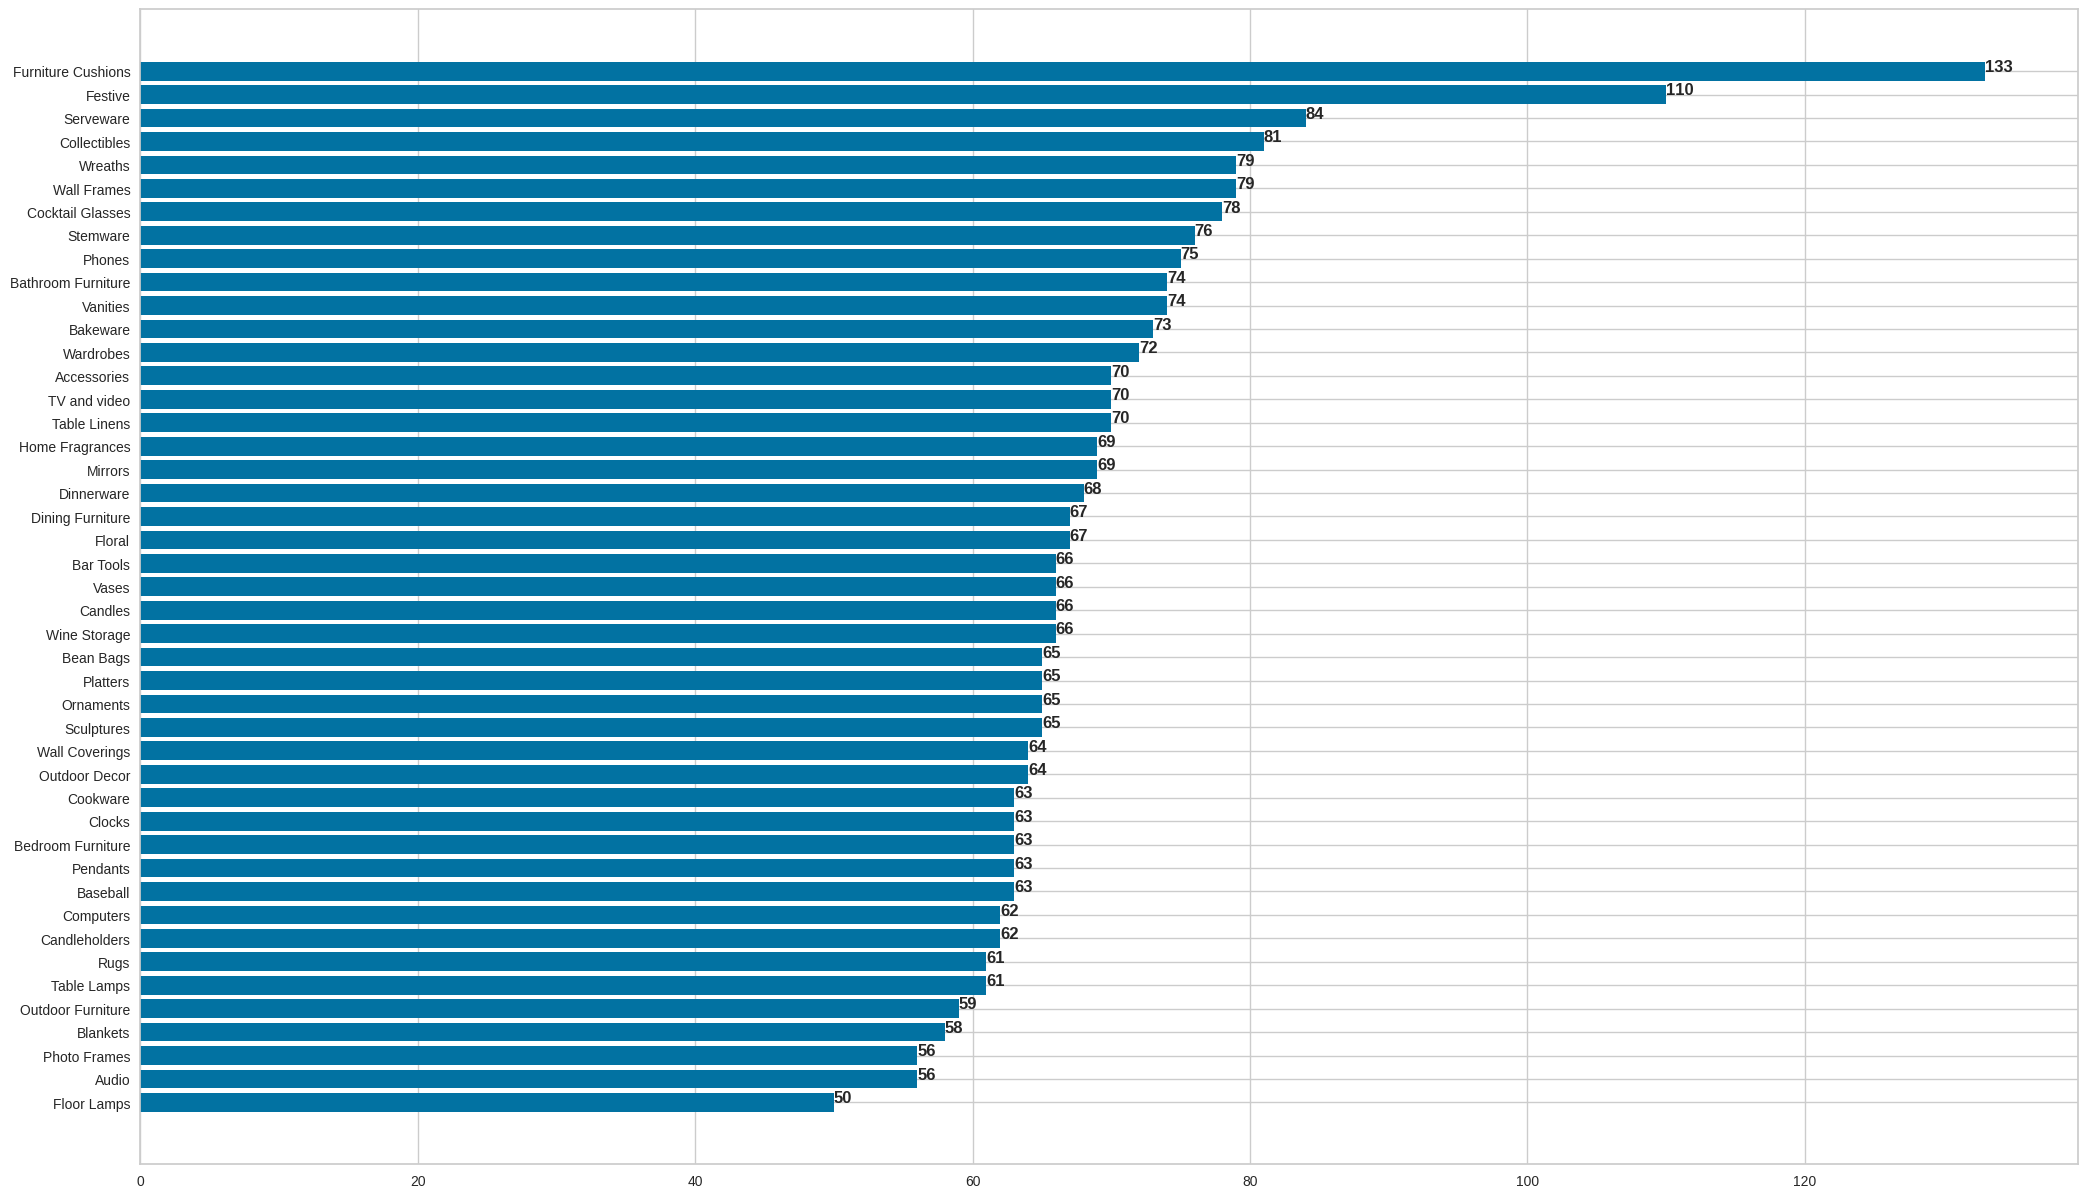

In [ ]:
fig = plt.figure(figsize =(25, 15))    #To create the canvas, figsize is showing size in inches (x,y)

K = sales_product.copy()

K.sort_values('Order_Quantity', ascending=True, inplace=True) #Sort the values descendingly
x = K['Product']    #assign the x
y = K['Order_Quantity']         #assign the y

plt.barh(x, y)  #Create the horizontal bar chart

#To show the data labels
for i, v in enumerate(y):                           #enumerate add numeric besides the data, example = (0, ‘value’)
    vmil = round(v)                                 #round the y
    plt.text(v, i, str(vmil), fontweight='bold')    #add text plt.text(x,y,s,fontweight = '')

plt.show()

# Generate Data to CSV

In [ ]:
df_eda.head()

OrderNumber Sales_Channel WarehouseCode ProcuredDate  OrderDate  \
4623         4724      In-Store  WARE-NMK1003    8/23/2019  12/1/2019   
4624         4725        Online  WARE-UHY1004    8/23/2019  12/2/2019   
4625         4726        Online  WARE-NMK1003    8/23/2019  12/2/2019   
4628         4729        Online  WARE-NBV1002    8/23/2019  12/2/2019   
4630         4731        Online  WARE-XYS1001    8/23/2019  12/2/2019   

        ShipDate DeliveryDate CurrencyCode  _SalesTeamID          SalesTeamID  \
4623  12/26/2019   2020-01-03          USD             9          Joshua Ryan   
4624  12/29/2019   2020-01-04          USD            15      Roger Alexander   
4625  12/29/2019   2020-01-02          USD            18        Shawn Wallace   
4628  12/25/2019   2020-01-01          USD            15      Roger Alexander   
4630  12/30/2019   2020-01-09          USD            19  Nicholas Cunningham   

      ...     Region  _ProductID             Product Order_Quantity  \
4623  ...      South          44             Festive              4   
4624  ...  Northeast          13            Bakeware              5   
4625  ...    Midwest          18  Furniture Cushions              1   
4628  ...       West          44             Festive              4   
4630  ...      South           3         Table Lamps              7   

      Discount_Applied Unit_Price  Unit_Cost  Tahun  Before_Disc      Profit  
4623              0.15     2572.8    1132.03   2020     36636.68   31141.178  
4624              0.05     1065.3     585.92   2020     23702.90   22517.755  
4625              0.05     2298.1    1884.44   2020       413.66     392.977  
4628              0.40     1098.8     472.48   2020     15690.88    9414.528  
4630              0.05     2532.6    1696.84   2020    112219.52  106608.544  

[5 rows x 23 columns]

In [ ]:
# Save the DataFrame to a CSV file
csv_filename = 'ABE_Clean.csv'
df_eda.to_csv(csv_filename, index=False)

print(f"DataFrame saved as {csv_filename}")

DataFrame saved as ABE_Clean.csv


##Modelling with Linear Regression

<ipython-input-70-e707a3bd8746>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriks_korelasi = df_eda.corr()


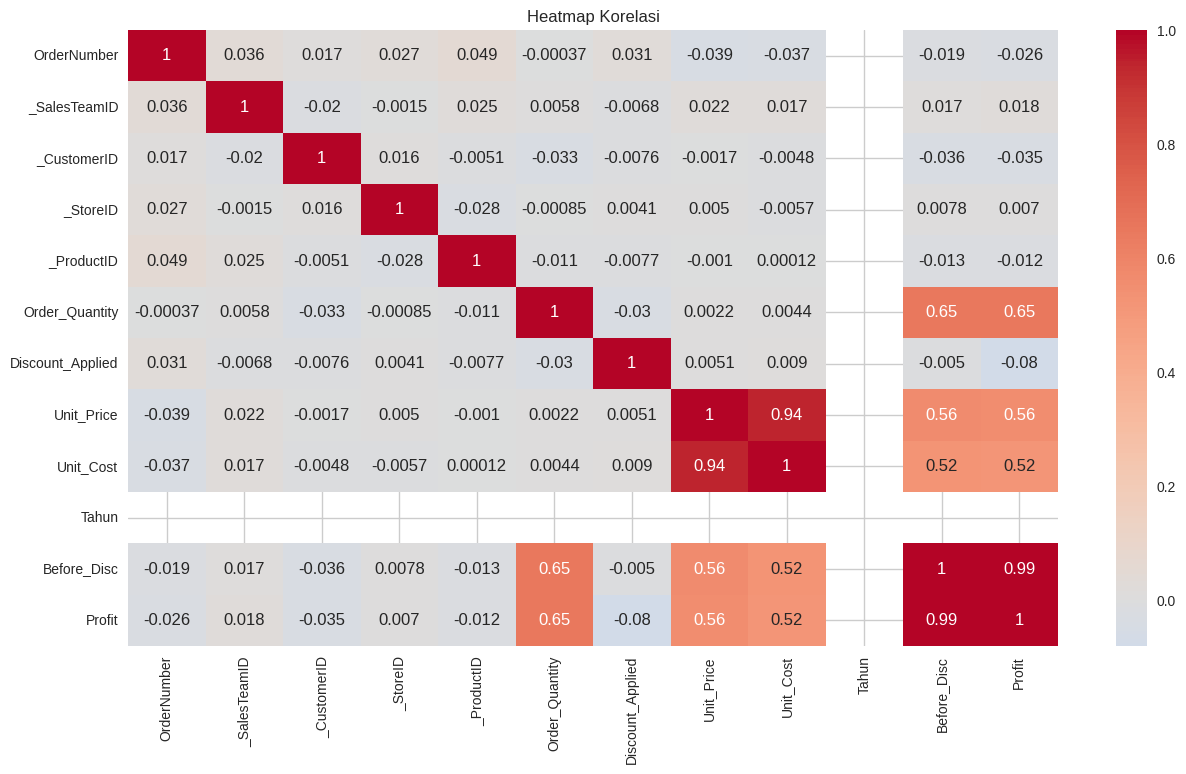

In [ ]:
# Hitung matriks korelasi
matriks_korelasi = df_eda.corr()

# Buat heatmap untuk matriks korelasi
plt.figure(figsize=(15, 8))
sns.heatmap(matriks_korelasi, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap Korelasi')

plt.show()

In [ ]:
df_eda['margin_product'] = df_eda['Unit_Price'] - df_eda['Unit_Cost']
df_eda['%margin'] = round(df_eda['margin_product']/df_eda['Unit_Price']*100)


df_eda.head()

OrderNumber Sales_Channel WarehouseCode ProcuredDate  OrderDate  \
4623         4724      In-Store  WARE-NMK1003    8/23/2019  12/1/2019   
4624         4725        Online  WARE-UHY1004    8/23/2019  12/2/2019   
4625         4726        Online  WARE-NMK1003    8/23/2019  12/2/2019   
4628         4729        Online  WARE-NBV1002    8/23/2019  12/2/2019   
4630         4731        Online  WARE-XYS1001    8/23/2019  12/2/2019   

        ShipDate DeliveryDate CurrencyCode  _SalesTeamID          SalesTeamID  \
4623  12/26/2019   2020-01-03          USD             9          Joshua Ryan   
4624  12/29/2019   2020-01-04          USD            15      Roger Alexander   
4625  12/29/2019   2020-01-02          USD            18        Shawn Wallace   
4628  12/25/2019   2020-01-01          USD            15      Roger Alexander   
4630  12/30/2019   2020-01-09          USD            19  Nicholas Cunningham   

      ...             Product  Order_Quantity Discount_Applied Unit_Price  \
4623  ...             Festive               4             0.15     2572.8   
4624  ...            Bakeware               5             0.05     1065.3   
4625  ...  Furniture Cushions               1             0.05     2298.1   
4628  ...             Festive               4             0.40     1098.8   
4630  ...         Table Lamps               7             0.05     2532.6   

      Unit_Cost Tahun  Before_Disc      Profit  margin_product  %margin  
4623    1132.03  2020     36636.68   31141.178         1440.77     56.0  
4624     585.92  2020     23702.90   22517.755          479.38     45.0  
4625    1884.44  2020       413.66     392.977          413.66     18.0  
4628     472.48  2020     15690.88    9414.528          626.32     57.0  
4630    1696.84  2020    112219.52  106608.544          835.76     33.0  

[5 rows x 25 columns]

###Checking Linearity

Profit vs Discount

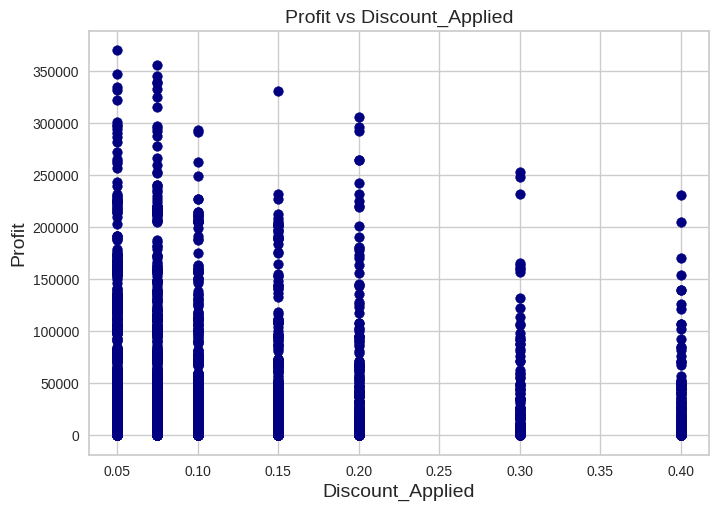

In [ ]:
plt.scatter(df_eda['Discount_Applied'], df_eda['Profit'], color='navy')
plt.title('Profit vs Discount_Applied', fontsize=14)
plt.xlabel('Discount_Applied', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.grid(True)
plt.show()

Profit vs Order Quantity

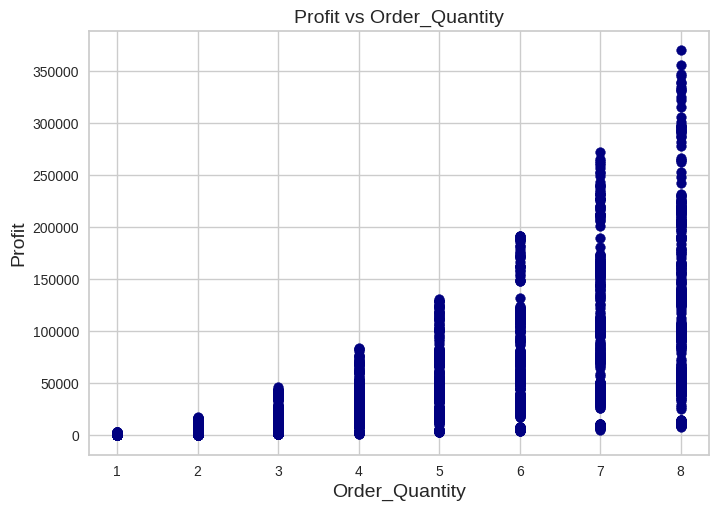

In [ ]:
plt.scatter(df_eda['Order_Quantity'], df_eda['Profit'], color='navy')
plt.title('Profit vs Order_Quantity', fontsize=14)
plt.xlabel('Order_Quantity', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.grid(True)
plt.show()

Profit vs Unit Price

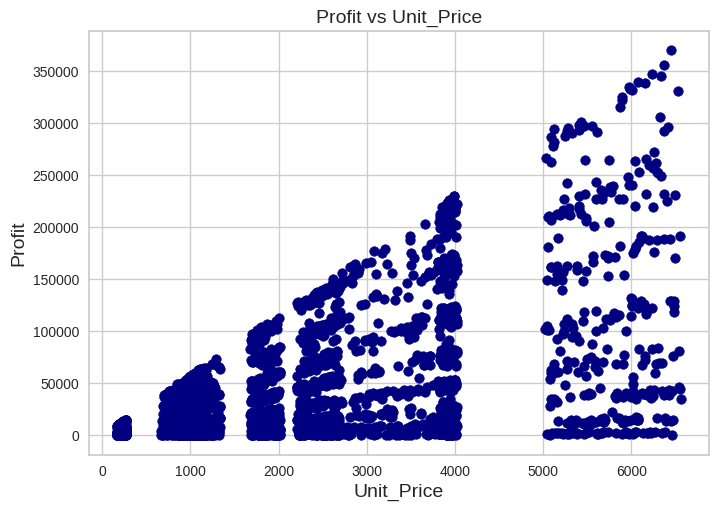

In [ ]:
plt.scatter(df_eda['Unit_Price'], df_eda['Profit'], color='navy')
plt.title('Profit vs Unit_Price', fontsize=14)
plt.xlabel('Unit_Price', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.grid(True)
plt.show()

Profit vs Unit Cost

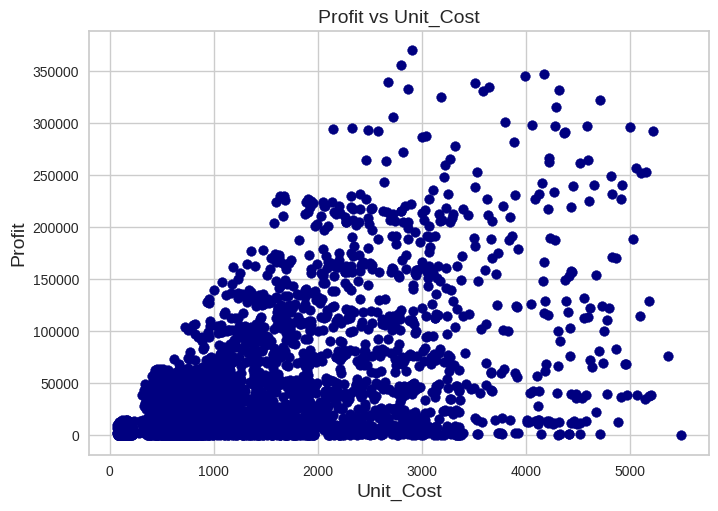

In [ ]:
plt.scatter(df_eda['Unit_Cost'], df_eda['Profit'], color='navy')
plt.title('Profit vs Unit_Cost', fontsize=14)
plt.xlabel('Unit_Cost', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.grid(True)
plt.show()

Profit vs Margin

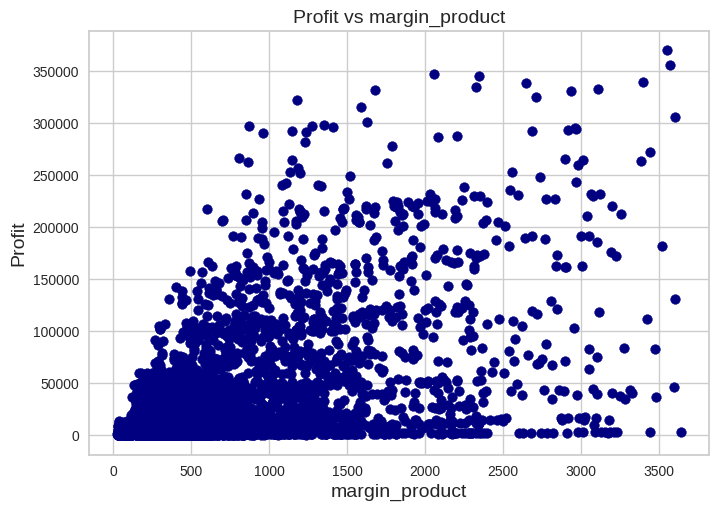

In [ ]:
plt.scatter(df_eda['margin_product'], df_eda['Profit'], color='navy')
plt.title('Profit vs margin_product', fontsize=14)
plt.xlabel('margin_product', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.grid(True)
plt.show()

###Checking Linear Regression All Variables

In [ ]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

x = df_eda[['Order_Quantity','margin_product','Unit_Price', 'Unit_Cost', 'Discount_Applied']]
y = df_eda['Profit']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

print_model = model.summary()
print(print_model)

Intercept: 
 -71688.21183713176
Coefficients: 
 [ 1.69459460e+04  8.68326011e+00  1.39393881e+01  5.25612803e+00
 -4.47380786e+04]
                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     2180.
Date:                Sun, 27 Aug 2023   Prob (F-statistic):               0.00
Time:                        02:18:55   Log-Likelihood:                -36826.
No. Observations:                3130   AIC:                         7.366e+04
Df Residuals:                    3125   BIC:                         7.369e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0

### Checking Regression Linear 'Profit vs Quantity Order

In [ ]:

x = df_eda[['Order_Quantity']]
y = df_eda['Profit']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

print_model = model.summary()
print(print_model)

Intercept: 
 -30534.813398966122
Coefficients: 
 [17023.72014513]
                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     2289.
Date:                Sun, 27 Aug 2023   Prob (F-statistic):               0.00
Time:                        02:18:55   Log-Likelihood:                -38052.
No. Observations:                3130   AIC:                         7.611e+04
Df Residuals:                    3128   BIC:                         7.612e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

### Checking Homoscedasticity

In [ ]:
#Importing Libraries
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
#The variables
x = df_eda[['Order_Quantity','margin_product','Unit_Price', 'Unit_Cost', 'Discount_Applied']]
y = df_eda['Profit']
#Fit the model
model = sm.OLS(y,x).fit()